# Infrared Thermography for Measuring Elevated Body Temperature

# Our best Model Performance

In [13]:
import pandas as pd

results = {
    'Model': [
        'aveOralF_Regression',
        'aveOralM_Regression',
        'aveOralF_Classification',
        'aveOralM_Classification'
    ],
    'Search Method': [
        'Grid Search: XGBoost',
        'Grid Search: XGBoost',
        'Random Forest Classifier',
        'Random Forest Classifier'
    ],
    'Metric': [
        'RMSE',
        'RMSE',
        'F1',
        'F1'
    ],
    'Value on Test set': [
        0.2233,
        0.2246,
        0.8333,
        0.8260
    ]
}

# Convert dictionary to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame as a table
print(results_df)

                     Model             Search Method Metric  Value on Test set
0      aveOralF_Regression      Grid Search: XGBoost   RMSE             0.2233
1      aveOralM_Regression      Grid Search: XGBoost   RMSE             0.2246
2  aveOralF_Classification  Random Forest Classifier     F1             0.8333
3  aveOralM_Classification  Random Forest Classifier     F1             0.8260


# Data Acquisition

In [7]:
!pip install ucimlrepo

#### We can find this dataset contains 2 different targets that are continuous data type and 33 features with 3 cateorical types and 30 continuous types, which mean we may have to perform one-hot encoding or label encoding.

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# metadata
print(infrared_thermography_temperature.metadata)

# variable information
print(infrared_thermography_temperature.variables)

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

# Import necessary library

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥1 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [5]:
# Train Model
import statsmodels.api as sm
import xgboost as xgb
from scipy.stats import randint, uniform
from seaborn import regplot
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, precision_recall_curve, roc_curve, f1_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from xgboost import XGBRegressor

## The gender, age and ethnicity has beem divide to some sub-categrories, so that mean if we decide to perform with one-hot encoding, there will be a a lot of 0 and 1 distributed in sparse vectors, it could lead an increase in the complexity of the model and also the loading of computing.

In [9]:
X.head(10).T

,0,1,2,3,4,5,6,7,8,9
Gender,Male,Female,Female,Female,Male,Female,Male,Female,Female,Male
Age,41-50,31-40,21-30,21-30,18-20,21-30,21-30,18-20,18-20,18-20
Ethnicity,White,Black or African-American,White,Black or African-American,White,White,White,White,Asian,Multiracial
T_atm,24.0,24.0,24.0,24.0,24.0,24.0,24.0,25.0,25.0,26.0
Humidity,28.0,26.0,26.0,27.0,27.0,26.0,31.0,30.0,30.0,31.0
Distance,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
T_offset1,0.7025,0.78,0.8625,0.93,0.895,0.8275,0.4425,0.5875,0.9775,1.0675
Max1R13_1,35.03,34.55,35.6525,35.2225,35.545,35.1325,35.2825,35.105,35.3075,35.89
Max1L13_1,35.3775,34.52,35.5175,35.6125,35.665,35.2025,35.615,34.87,35.4225,35.765
aveAllR13_1,34.4,33.93,34.2775,34.385,34.91,34.5275,34.75,34.2725,34.5575,35.4225


In [5]:
y.head(10).T

,0,1,2,3,4,5,6,7,8,9
aveOralF,36.85,37.00,37.20,36.85,36.80,36.90,36.95,36.80,36.80,36.80
aveOralM,36.59,37.19,37.34,37.09,37.04,36.99,36.59,36.49,36.59,36.89


# Data Preprocess
## Therefore, we decide to use label encoding, convert categorical features to numeric types so that the machine can process, further improve the prediction accuracy.

In [10]:
combined_df = pd.concat([X, y], axis=1)

print("first 3 rows:")
print(combined_df.head(3))

print("\nlast 3 rows:")
print(combined_df.tail(3))

first 3 rows:
   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHLC1  T_FHBC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.3725  33.4925   
1     0.7800    34.5500    34.5200      33.9300  ...  33.6775  33.9700   
2     0.8625    35.6525    35.5175      34.2775  ...  34.6475  34.8200   

   T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  aveOralF  \
0  33.0025    34.5300     34.0075  35.6925  35.6350    35.6525     36.85   
1  34.0025    34.6825     34.6600  35.1750  35.0925    35.1075     37.00   
2  34.6700    35.3450     35.2225  35.9125  35.8600    35.8850     37.20   

   aveOralM  
0     36.59  
1     37.19  
2     37.34  

[3 rows x 35 columns]

last 3 

In [7]:
combined_df

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Female,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.95,36.99
1016,Female,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.25,37.19
1017,Female,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.35,37.59
1018,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.15,37.29


## Surprisingly, seems there are 2 missing value in the "Distance", but the dataset description from the authors claims there's no missing value.

In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

## There are 2 missing value indeed. Let's take more examine about the dataset.

In [9]:
print(combined_df.isnull().sum())  # check null in features

Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralF       0
aveOralM       0
dtype: int64


In [10]:
combined_df.duplicated().sum()

0

## Apparently, we can find seems there's a max number "79.0" in the distance feature. Consider this is a thermometer, it is unreasonable no matter the measurement is millimeter, centimeter, or meter, so this value should be handled.
## Second, the standard deviation of humidity is quite high, but consider the raining or wet weather, so we put it away for now. All other statistical looks normal.

In [11]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
T_atm,1020.0,24.115392,1.336338,20.2000,23.400000,24.000000,24.700000,29.1000
Humidity,1020.0,28.723039,13.071627,9.9000,17.600000,26.300000,36.200000,61.2000
Distance,1018.0,0.729784,2.456486,0.5400,0.600000,0.620000,0.700000,79.0000
T_offset1,1020.0,0.968648,0.362587,-0.5900,0.772500,0.940000,1.140000,2.8750
Max1R13_1,1020.0,35.596533,0.574888,33.8975,35.247500,35.548750,35.872500,38.4050
Max1L13_1,1020.0,35.611474,0.549760,34.1225,35.271875,35.575000,35.883125,38.0425
aveAllR13_1,1020.0,34.888475,0.718613,31.7700,34.456250,34.915000,35.300000,37.5750
aveAllL13_1,1020.0,35.011345,0.633836,32.9025,34.651250,34.997500,35.363125,37.6800
T_RC1,1020.0,35.659921,0.553897,33.9850,35.332500,35.602500,35.910625,38.3850
T_RC_Dry1,1020.0,35.587143,0.569278,33.8250,35.249375,35.533750,35.855625,38.3800


## There are many ways to dealt with missing value and outlier, for example, we can simplely use sklearn imputer to replace missing value, but we decide take a close look and find the lier as well. And we can find the outlier is in row 97 and missing vaalue in row 902 and 903.

In [12]:
# Set option to display more rows, if necessary
pd.set_option('display.max_rows', None)

# Print the 'Distance' column of the DataFrame
print(combined_df['Distance'])

0        0.80
1        0.80
2        0.80
3        0.80
4        0.80
5        0.80
6        0.80
7        0.80
8        0.80
9        0.80
10       0.80
11       0.80
12       0.80
13       0.80
14       0.80
15       0.80
16       0.80
17       0.80
18       0.80
19       0.80
20       0.80
21       0.80
22       0.80
23       0.80
24       0.80
25       0.80
26       0.80
27       0.80
28       0.80
29       0.80
30       0.80
31       0.80
32       0.80
33       0.80
34       0.80
35       0.80
36       0.80
37       0.80
38       0.80
39       0.80
40       0.80
41       0.80
42       0.80
43       0.80
44       0.60
45       0.60
46       0.65
47       0.65
48       0.60
49       0.60
50       0.60
51       0.60
52       0.60
53       0.60
54       0.60
55       0.60
56       0.60
57       0.60
58       0.60
59       0.60
60       0.65
61       0.60
62       0.60
63       0.73
64       0.73
65       0.60
66       0.70
67       0.60
68       0.60
69       0.60
70       0.76
71    

## We decide to use median to replace missing value and outliers since there are only three values.

In [11]:
# cauculate median
median_value = combined_df['Distance'].median()

# replce outlier with median
combined_df.loc[97, 'Distance'] = median_value

# replce missing value with median
combined_df.loc[902, 'Distance'] = median_value
combined_df.loc[903, 'Distance'] = median_value

# check results
print("outlier value now：", combined_df.loc[97, 'Distance'])
print("missing valaue now：", combined_df.loc[[902, 903], 'Distance'])

# check again
print("check missing value again：", combined_df['Distance'].isnull().sum())

outlier value now： 0.62
missing valaue now： 902    0.62
903    0.62
Name: Distance, dtype: float64
check missing value again： 0


In [14]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
T_atm,1020.0,24.115392,1.336338,20.2000,23.400000,24.000000,24.700000,29.1000
Humidity,1020.0,28.723039,13.071627,9.9000,17.600000,26.300000,36.200000,61.2000
Distance,1020.0,0.652725,0.067623,0.5400,0.600000,0.620000,0.700000,0.9200
T_offset1,1020.0,0.968648,0.362587,-0.5900,0.772500,0.940000,1.140000,2.8750
Max1R13_1,1020.0,35.596533,0.574888,33.8975,35.247500,35.548750,35.872500,38.4050
Max1L13_1,1020.0,35.611474,0.549760,34.1225,35.271875,35.575000,35.883125,38.0425
aveAllR13_1,1020.0,34.888475,0.718613,31.7700,34.456250,34.915000,35.300000,37.5750
aveAllL13_1,1020.0,35.011345,0.633836,32.9025,34.651250,34.997500,35.363125,37.6800
T_RC1,1020.0,35.659921,0.553897,33.9850,35.332500,35.602500,35.910625,38.3850
T_RC_Dry1,1020.0,35.587143,0.569278,33.8250,35.249375,35.533750,35.855625,38.3800


# EDA

## Most of features are normal except humidity. Let's check later.

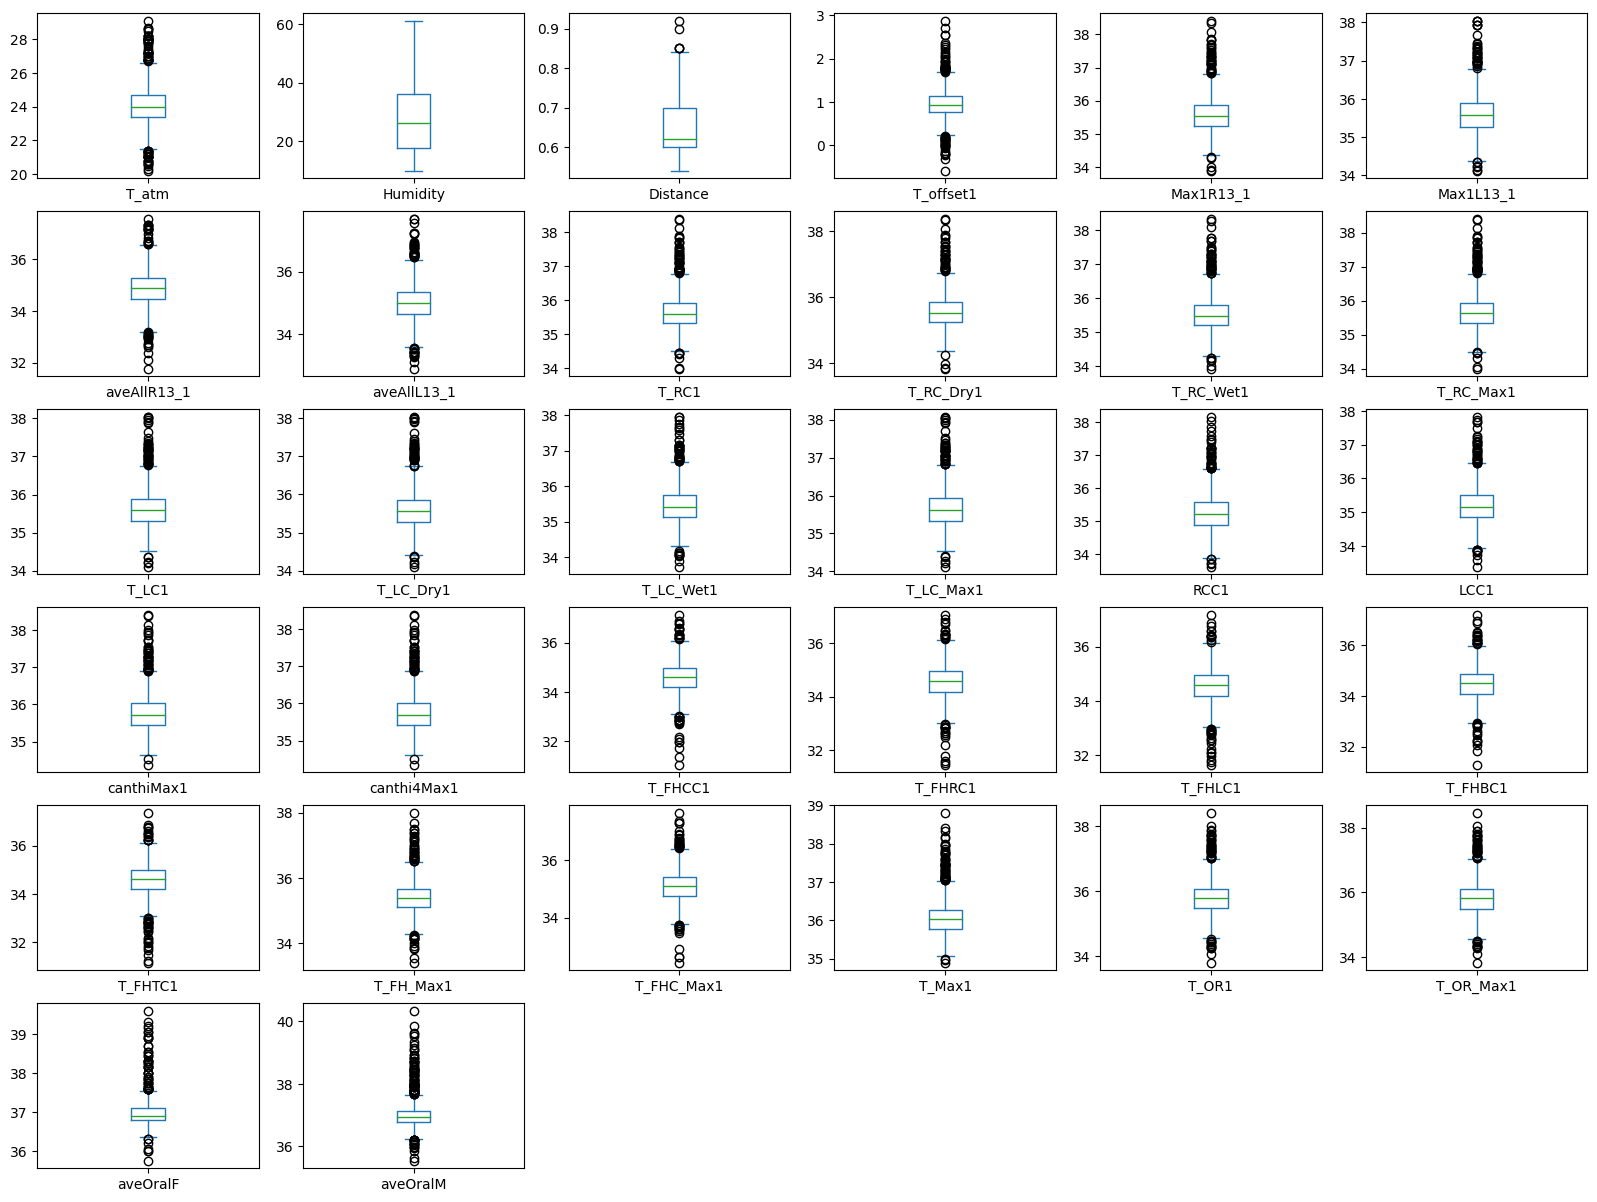

In [12]:
combined_df.plot(kind='box', subplots=True, layout=(6, 6), figsize=(20, 15))
plt.show()

## Actually, the outlier of humidity seems not single value, they are clutch, proving our opinion is acceptale, meaning it could be raining day or wet weather, so we won't process it.

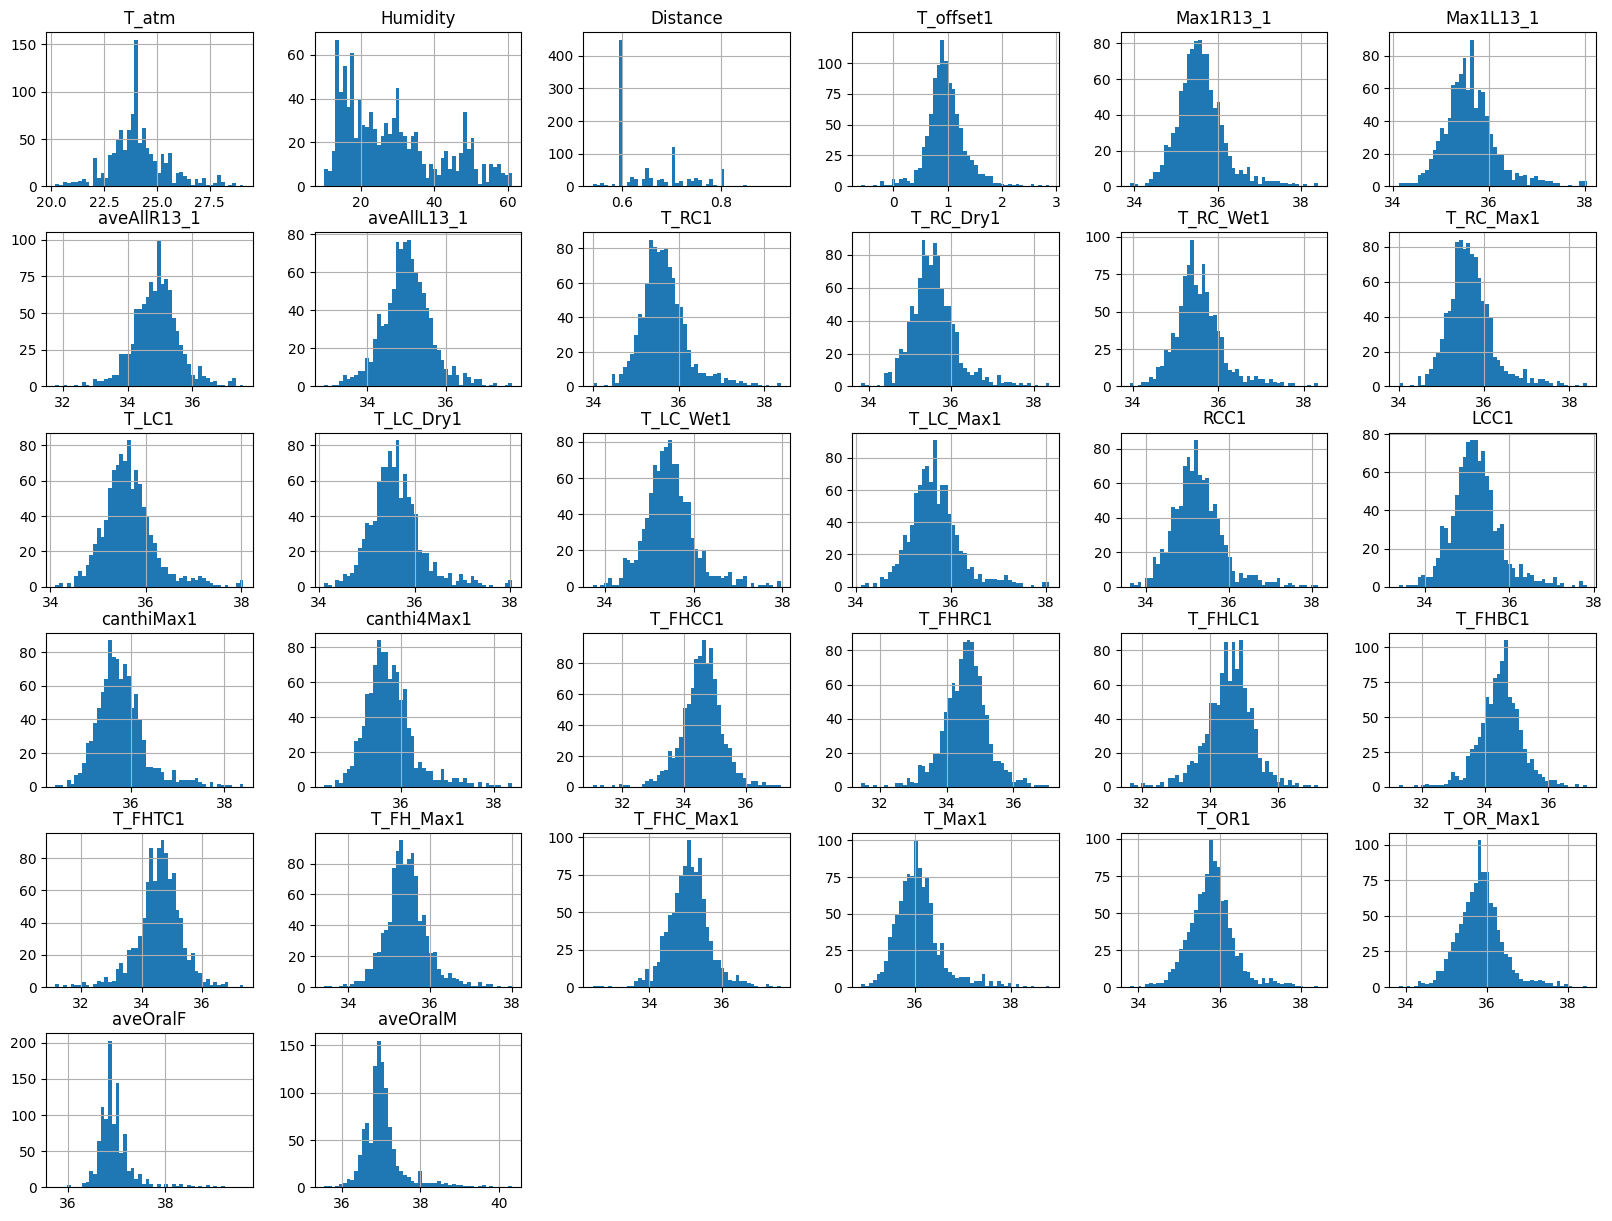

In [16]:
%matplotlib inline
combined_df.hist(bins=50, figsize=(20,15))
plt.show()

## As we mentioned before, we convert Gender, Age, and Ethnicity to lable encoded.

In [17]:
# Create a copy of combined_df to avoid changing the original DataFrame
combined_df_encoded = combined_df.copy()

# Initialize label encoders
label_encoders = {}

# For each categorical column, fit a label encoder, transform the data, and store the encoder
for column in ['Gender', 'Ethnicity', 'Age']:
    label_encoders[column] = LabelEncoder()
    combined_df_encoded[column] = label_encoders[column].fit_transform(combined_df_encoded[column])

# Combined_df_encoded contains the label encoded categorical features
print(combined_df_encoded.head())

   Gender  Age  Ethnicity  T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
0       1    5          5   24.0      28.0       0.8     0.7025    35.0300   
1       0    4          2   24.0      26.0       0.8     0.7800    34.5500   
2       0    2          5   24.0      26.0       0.8     0.8625    35.6525   
3       0    2          2   24.0      27.0       0.8     0.9300    35.2225   
4       1    0          5   24.0      27.0       0.8     0.8950    35.5450   

   Max1L13_1  aveAllR13_1  ...  T_FHLC1  T_FHBC1  T_FHTC1  T_FH_Max1  \
0    35.3775      34.4000  ...  33.3725  33.4925  33.0025    34.5300   
1    34.5200      33.9300  ...  33.6775  33.9700  34.0025    34.6825   
2    35.5175      34.2775  ...  34.6475  34.8200  34.6700    35.3450   
3    35.6125      34.3850  ...  34.6550  34.3025  34.9175    35.6025   
4    35.6650      34.9100  ...  34.3975  34.6700  33.8275    35.4175   

   T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  aveOralF  aveOralM  
0     34.0075  35.6925  35.6350  

## Now the data type is int64, numerical type.

In [18]:
combined_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   int64  
 1   Age          1020 non-null   int64  
 2   Ethnicity    1020 non-null   int64  
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1020 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

## Since our job is to predict if people is fever or not, we should set our target for regression and classification tasks. Temperature over than 37.5 is be regarded as fever in common awareness. So we set our target append a new column into our dataframe.

In [19]:
# Add binary fever index to combined_df_encoded
combined_df_encoded['Fever_aveOralF'] = (combined_df_encoded['aveOralF'] > 37.5).astype(int)
combined_df_encoded['Fever_aveOralM'] = (combined_df_encoded['aveOralM'] > 37.5).astype(int)

## We can see 0 is normal, 1 is fever.

In [20]:
combined_df_encoded['Fever_aveOralF']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      1
67      0
68      0
69      0
70      0
71      0
72      1
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      1
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      1
99      0


## Further examine the balance of dataset. Almost 95% data point is normal, so this is an imbalanced dataset in our targets, aveOralM and aveOralF. We should perform stratified sampling for our classification tasks.

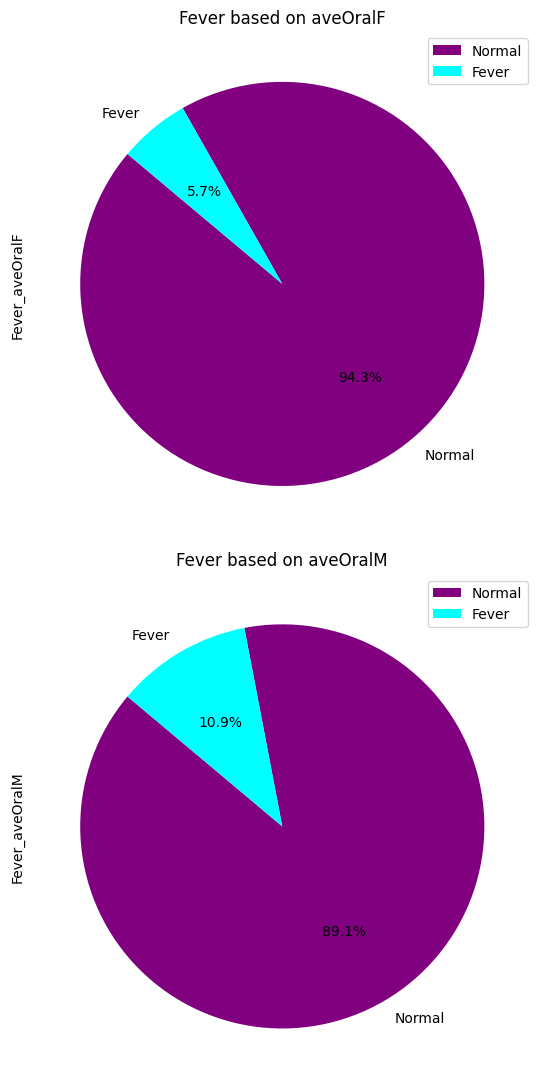

In [178]:
# piechart based on 'aveOralF'
plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)
combined_df_encoded['Fever_aveOralF'].value_counts().plot.pie(
    labels=['Normal', 'Fever'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['Purple', 'Cyan'],
    legend=True
)
plt.title('Fever based on aveOralF')

# piechart based on 'aveOralM'
plt.subplot(2, 1, 2)
combined_df_encoded['Fever_aveOralM'].value_counts().plot.pie(
    labels=['Normal', 'Fever'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['Purple', 'Cyan'],
    legend=True
)
plt.title('Fever based on aveOralM')

plt.tight_layout()
plt.show()

## We examine the heatmap map and try to select some obvious feature for our training. Unfortunatly, there are too many variables so that it is hard to identify by our eyes.

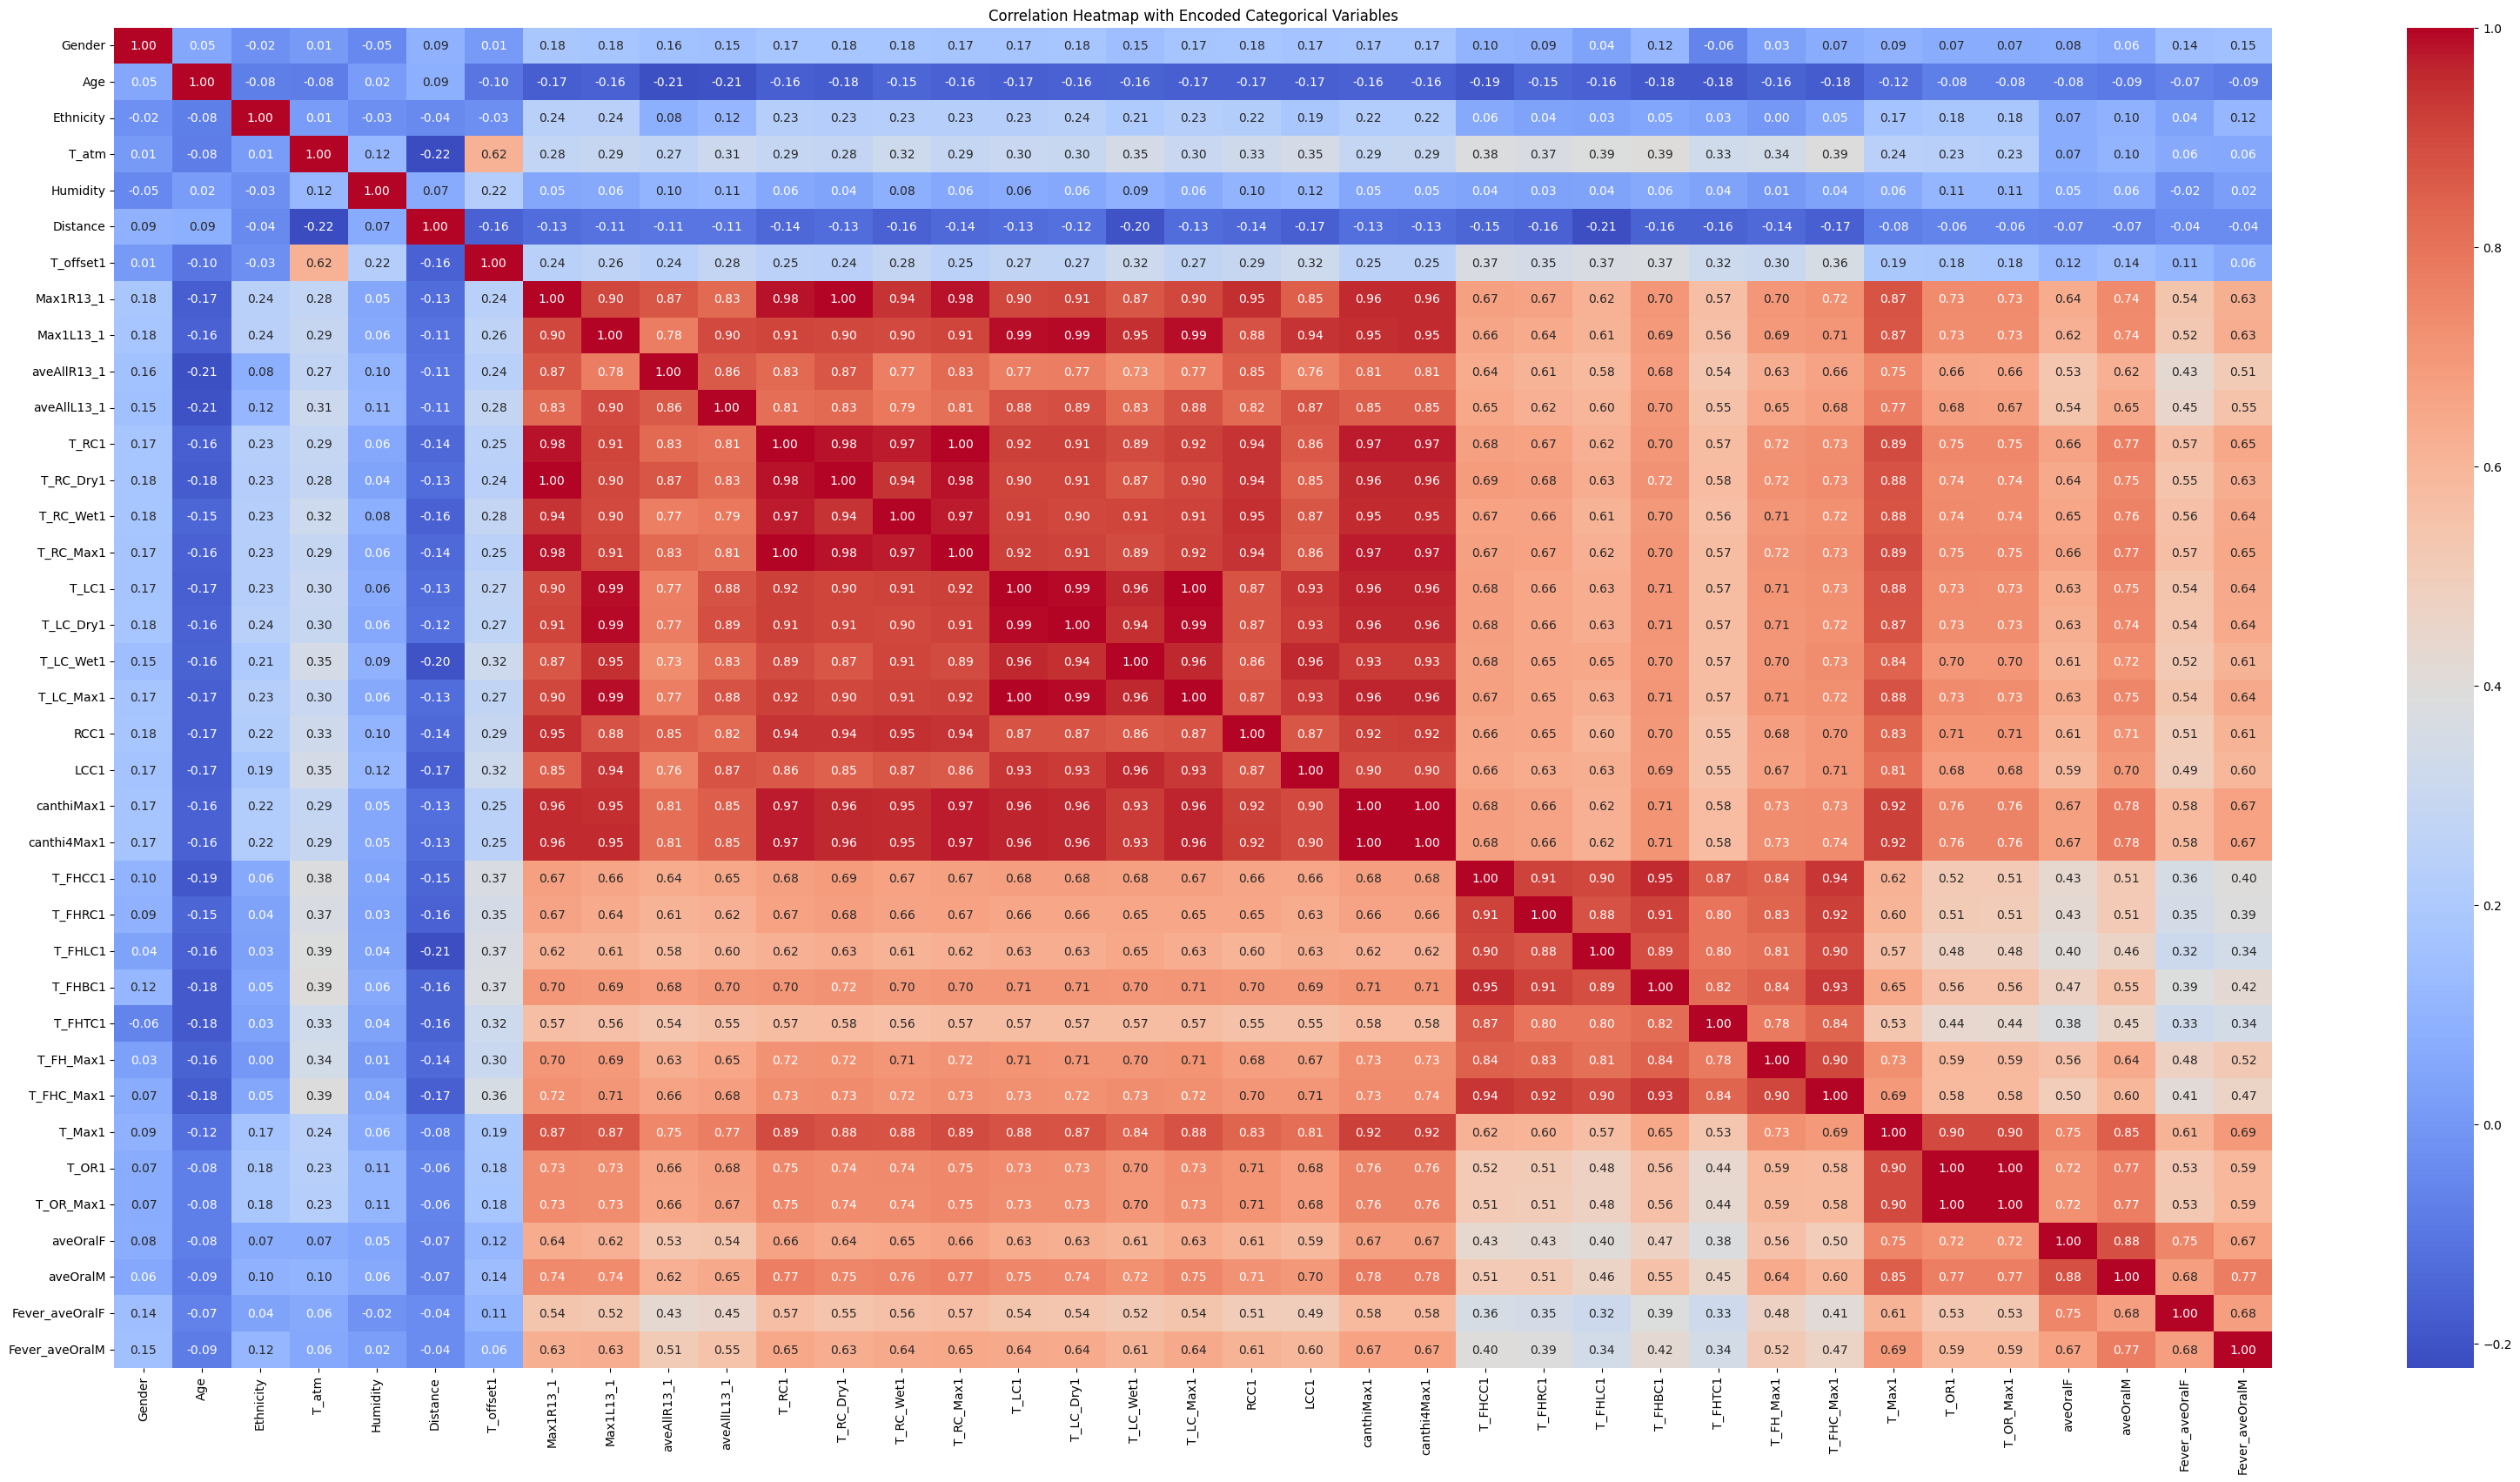

In [179]:
# Compute the correlation matrix for the combined DataFrame with encoded categorical variables
corr_matrix_encoded = combined_df_encoded.corr()

# heatmap for the new correlation matrix
plt.figure(figsize=(40, 20))
sns.heatmap(corr_matrix_encoded, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap with Encoded Categorical Variables')
plt.show()

# Feature Selection
## Therefore, we perform feature selection for certain models, especailly for MLP (<MultiLayer Perceptron). We further drop our target from dataframe because it could affect our model performance by too high-correlations, and it could lead to overfit as well. So we set our target aveOralF for one of four tasks.
## We can see the selected features is 'Ethnicity', 'T_atm', 'T_offset1', 'Max1R13_1', 'aveAllL13_1', 'T_RC1', 'T_FHCC1', 'T_FHRC1', 'T_FHBC1', 'T_FH_Max1', 'T_Max1', 'T_OR1'].

In [23]:
# Copy the preprocessed DataFrame for separate analyses
reg_f = combined_df_encoded.copy()
reg_m = combined_df_encoded.copy()
class_f = combined_df_encoded.copy()
class_m = combined_df_encoded.copy()

# Separate the features from the target
X = reg_f.drop(['aveOralF', 'aveOralM', 'Fever_aveOralF', 'Fever_aveOralM'], axis=1)
y = reg_f['aveOralF']  # Assuming 'aveOralF' is the continuous target for regression

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the full model with all features
model = sm.OLS(y, X).fit()

# Backward elimination process
p_value_threshold = 0.05
variables = X.columns.tolist()
while len(variables) > 0:
    # Fit the model and get the p-values
    model = sm.OLS(y, X[variables]).fit()
    p_values = model.pvalues

    # Get the max p-value and its corresponding variable
    max_p_value_var = p_values.idxmax()
    max_p_value = p_values.max()

    # Check if the max p-value is greater than the threshold
    if max_p_value > p_value_threshold:
        # Remove the variable with the highest p-value
        variables.remove(max_p_value_var)
    else:
        # Exit the loop if no variable has p-value above the threshold
        break

# Final variables are now selected
final_features = variables
print('Selected features for aveOralF Regression:', final_features)

Selected features for aveOralF Regression: ['const', 'Ethnicity', 'T_atm', 'T_offset1', 'Max1R13_1', 'aveAllL13_1', 'T_RC1', 'T_FHCC1', 'T_FHRC1', 'T_FHBC1', 'T_FH_Max1', 'T_Max1', 'T_OR1']


## We exclude the columns should be exclude, including our target related features, including binary indicators and label-encoded categorical columns. Then assign the specific columns need to be standarized. Next, standardized the dataframe. Lastly, all related columns has been standarized.

In [24]:
# List of columns to exclude from standardization, including binary indicators and label-encoded categorical columns
columns_to_exclude = ['aveOralF', 'aveOralM', 'Fever_aveOralF', 'Fever_aveOralM', 'Age', 'Gender', 'Ethnicity']

# Selecting the columns that need to be standardized, excluding the label-encoded categorical columns and binary indicators
columns_to_scale = [col for col in combined_df_encoded.columns if col not in columns_to_exclude]

# Instantiating the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data for the specified columns
combined_df_encoded[columns_to_scale] = scaler.fit_transform(combined_df_encoded[columns_to_scale])

# Combined_df_encoded' has the standardized columns except the ones we excluded
print(combined_df_encoded.head())

   Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
0       1    5          5 -0.086392 -0.055341  2.178928  -0.734385  -0.985950   
1       0    4          2 -0.086392 -0.208419  2.178928  -0.520538  -1.821305   
2       0    2          5 -0.086392 -0.208419  2.178928  -0.292895   0.097401   
3       0    2          2 -0.086392 -0.131880  2.178928  -0.106642  -0.650938   
4       1    0          5 -0.086392 -0.131880  2.178928  -0.203217  -0.089684   

   Max1L13_1  aveAllR13_1  ...   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1  \
0  -0.425802    -0.680080  ... -2.162224  -1.703974   -1.887314 -0.798009   
1  -1.986339    -1.334438  ... -0.789203  -1.412510   -0.754033 -1.850738   
2  -0.171020    -0.850631  ...  0.127288  -0.146314    0.222933 -0.350472   
3   0.001867    -0.700964  ...  0.467111   0.345830    0.383589 -0.742067   
4   0.097411     0.029969  ... -1.029482  -0.007750    0.483457 -0.386072   

      T_OR1  T_OR_Max1  aveOralF  aveOralM  Fever_

# aveOralF_Regression

# Random Sampling for Regression Model
## We use random sampling for regression task. Split 80% for traning and 20% for test. Of course, drop the feature sgold not included, such as our target, and assign aveOralF as our target in y_train.

In [25]:
# Separating the target variable 'aveOralF' and dropping it from the features set
X = combined_df_encoded.drop(['aveOralF', 'Fever_aveOralF', 'aveOralM', 'Fever_aveOralM'], axis=1)
y = combined_df_encoded['aveOralF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features
    y,  # Target
    test_size=0.2,
    random_state=42
)

print(X_train.head())
print(y_train.head())

     Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  \
743       0    0          5 -0.236128 -0.330882 -0.040324   0.831524   
137       0    1          2 -0.011524 -0.216073  2.030978  -0.010066   
799       1    1          5  3.357541  1.567288 -0.780074   4.322053   
933       1    1          2 -0.161260 -0.721231 -0.188274  -0.175624   
822       0    0          5  0.287949 -0.430382 -0.780074   0.390035   

     Max1R13_1  Max1L13_1  aveAllR13_1  ...   T_FHCC1   T_FHRC1   T_FHLC1  \
743   0.255481   0.203569     0.299137  ...  0.921647  0.845265  1.245204   
137   0.206171  -0.384855     0.499854  ... -0.314470 -0.530999 -0.217947   
799   4.326387   4.424148     3.740320  ...  3.795590  3.747254  3.832438   
933   0.658655   1.248477     0.478970  ...  0.946444  1.131728  1.020388   
822  -0.107087  -0.726080    -0.196272  ... -1.467519 -1.509953 -1.471023   

      T_FHBC1   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  
743  0.916976  0.992291 

# Linear Regression
## The residuals are near the 0 line, which means the model's prediction have negative an positive deviations. Residual doesn't increase or decrease with the predicted values, indicating that the model's variance is fixed stable. There are some outliers, meaning the actual and predication exsist errors.

In [26]:
# Instantiate the Linear Regression model
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predictions on the training and testing datasets
y_train_pred = linear_model.predict(X_train)

# Evaluate the model with Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Training RMSE:", train_rmse)

Training RMSE: 0.240049614464006


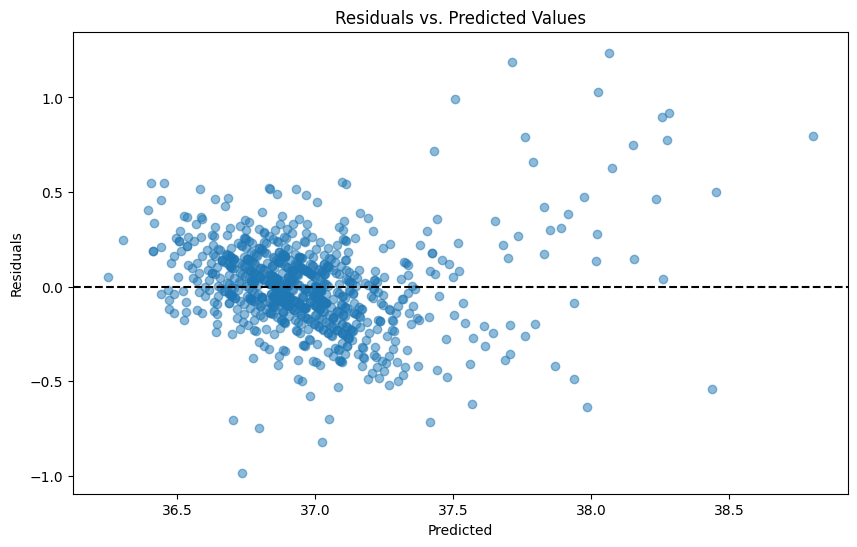

In [28]:
# Calculate residuals
residuals = y_train - y_train_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='k', linestyle='--')  # Zero line for reference
plt.show()

In [29]:
# Comparing actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
print(comparison_df.head())

     Actual  Predicted
743   36.75  36.935362
137   37.10  37.007944
799   39.15  38.255043
933   38.00  37.651195
822   36.90  36.800659


## RMSE is 0.247, and the standard deviation is 0.033, which means the model performs well, indicating that the model's performance is stable at different cross-validation folds.

In [30]:
# Instantiate the Linear Regression model (again for clarity)
linear_model_cv = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(linear_model_cv, X, y, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

# Calculate RMSE from cross-validation scores
cv_rmse = np.sqrt(-cv_scores)

print("Cross-validation RMSE scores:", cv_rmse)
print("Mean RMSE:", cv_rmse.mean())
print("Standard deviation of RMSE:", cv_rmse.std())

Cross-validation RMSE scores: [0.22139286 0.26357602 0.21070615 0.2472655  0.22440635 0.21124255
 0.30398641 0.30622049 0.25378702 0.22780221]
Mean RMSE: 0.24703855582986858
Standard deviation of RMSE: 0.03347535522524576


# SGD Linear Regression

In [31]:
# SGD is sensitive to feature scaling, therefore scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

sgd_regressor.fit(X_train_scaled, y_train)

SGDRegressor(random_state=42)

In [32]:
y_train_pred_sgd = sgd_regressor.predict(X_train_scaled)

train_rmse_sgd = np.sqrt(mean_squared_error(y_train, y_train_pred_sgd))

print("Training RMSE (SGD):", train_rmse_sgd)

Training RMSE (SGD): 0.25062086216030555


In [33]:
# Comparing actual and predicted values using SGDRegressor predictions
comparison_df_sgd = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_sgd})
print(comparison_df_sgd.head())

     Actual  Predicted
743   36.75  36.950342
137   37.10  36.896879
799   39.15  38.382329
933   38.00  37.725069
822   36.90  36.925938


## As same result as Linear Regression, it could be the reason that we use the same parameters in CV or the feature correlation is relative low.

In [34]:
# Instantiate the Linear Regression model
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

cv_scores = cross_val_score(linear_model_cv, X, y, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

cv_rmse = np.sqrt(-cv_scores)

print("Cross-validation RMSE scores:", cv_rmse)
print("Mean RMSE:", cv_rmse.mean())
print("Standard deviation of RMSE:", cv_rmse.std())

Cross-validation RMSE scores: [0.22139286 0.26357602 0.21070615 0.2472655  0.22440635 0.21124255
 0.30398641 0.30622049 0.25378702 0.22780221]
Mean RMSE: 0.24703855582986858
Standard deviation of RMSE: 0.03347535522524576


# Polynomial Regression

In [35]:
features_select_fR = X_train[['Ethnicity', 'T_atm', 'T_offset1', 'Max1R13_1', 'aveAllL13_1', 'T_RC1', 'T_FHCC1', 'T_FHRC1', 'T_FHBC1', 'T_FH_Max1', 'T_Max1', 'T_OR1']]

In [36]:
features_select_fR

,Ethnicity,T_atm,T_offset1,Max1R13_1,aveAllL13_1,T_RC1,T_FHCC1,T_FHRC1,T_FHBC1,T_FH_Max1,T_Max1,T_OR1
743,5,-0.236128,0.831524,0.255481,0.271478,0.174750,0.921647,0.845265,0.916976,0.761524,-0.009734,-0.325922
137,2,-0.011524,-0.010066,0.206171,-0.077100,0.113035,-0.314470,-0.530999,-0.063949,-0.896476,-0.106361,0.307667
799,5,3.357541,4.322053,4.326387,4.212387,4.430035,3.795590,3.747254,4.080646,4.932803,4.191009,3.702218
933,2,-0.161260,-0.175624,0.658655,0.779219,0.731685,0.946444,1.131728,1.021808,1.382677,1.927897,2.123461
822,5,0.287949,0.390035,-0.107087,-0.258624,-0.261767,-1.467519,-1.509953,-1.509128,-0.538118,-1.001435,-0.788070
765,5,0.737157,1.500657,1.224260,1.702623,1.101972,1.058030,0.967323,1.194031,0.646850,1.231163,1.251344
261,5,1.036630,0.334848,3.438822,4.200548,3.427552,2.995895,2.413336,3.009866,3.571045,3.779072,2.847990
567,5,-0.460732,0.038222,0.001683,0.747650,-0.054045,-0.087580,-0.090096,-0.172524,-0.657571,-0.106361,-0.470530
832,5,-0.236128,0.107205,0.771776,1.201459,0.677497,0.329005,-0.011631,0.299218,0.350608,0.570029,0.428422
381,2,-2.482171,-1.355230,0.114804,0.775273,-0.049529,-1.103006,-0.325494,-0.681707,0.460504,1.337962,1.613608


In [37]:
selected_features = ['Ethnicity', 'T_atm', 'T_offset1', 'Max1R13_1', 'aveAllL13_1', 'T_RC1', 'T_FHCC1', 'T_FHRC1', 'T_FHBC1', 'T_FH_Max1', 'T_Max1', 'T_OR1']

# Apply the feature selection to X_train and X_test
X_train_selected = X_train[selected_features]

# Initialize the PolynomialFeatures transformer and Linear Regression model within a pipeline
poly_regression_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

# Fit the pipeline to the selected features from the training data
poly_regression_pipeline.fit(X_train_selected, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [38]:
y_train_pred = poly_regression_pipeline.predict(X_train_selected)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Training RMSE:", train_rmse)

Training RMSE: 0.20421622219777874


In [39]:
comparison_df_poly = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

print(comparison_df_poly.head())

     Actual  Predicted
743   36.75  36.877791
137   37.10  37.007632
799   39.15  39.356817
933   38.00  37.601625
822   36.90  36.778157


In [40]:
cv_scores = cross_val_score(poly_regression_pipeline, X_train_selected, y_train, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

# Convert scores to positive as 'cross_val_score' returns negative MSE scores for maximization
cv_scores_positive = -cv_scores

cv_rmse_scores = np.sqrt(cv_scores_positive)

print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())
print("Standard Deviation of RMSE:", cv_rmse_scores.std())

Cross-validation RMSE scores: [0.25893988 0.26514904 0.24945577 0.1977077  0.25023518 0.20291554
 0.22968308 0.27047245 0.26553518 0.22825304]
Mean RMSE: 0.241834685818277
Standard Deviation of RMSE: 0.024780324253796206


# Decision Tree

In [41]:
dtr_regressor = DecisionTreeRegressor(random_state=42)

dtr_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [42]:
y_train_pred = dtr_regressor.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Training RMSE:", train_rmse)

# Tree's quantity
print("Decision Tree depth:", dtr_regressor.get_depth())
print("Number of leaves:", dtr_regressor.get_n_leaves())

Training RMSE: 0.0
Decision Tree depth: 28
Number of leaves: 599


In [43]:
dtr_regressor2 = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr_regressor2.fit(X_train, y_train)
y_train_pred = dtr_regressor2.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Training RMSE:", train_rmse)
print("Decision Tree depth:", dtr_regressor2.get_depth())
print("Number of leaves:", dtr_regressor2.get_n_leaves())

Training RMSE: 0.1764186333011641
Decision Tree depth: 5
Number of leaves: 29


In [44]:
cv_scores = cross_val_score(poly_regression_pipeline, X_train_selected, y_train, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

cv_scores_positive = -cv_scores

cv_rmse_scores = np.sqrt(cv_scores_positive)

print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())
print("Standard Deviation of RMSE:", cv_rmse_scores.std())

Cross-validation RMSE scores: [0.25893988 0.26514904 0.24945577 0.1977077  0.25023518 0.20291554
 0.22968308 0.27047245 0.26553518 0.22825304]
Mean RMSE: 0.241834685818277
Standard Deviation of RMSE: 0.024780324253796206


# KNN

In [45]:
knn_regressor = KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [46]:
# overfitting because mse is 0
F_prediction_KNN = knn_regressor.predict(X_train)
F_KNN_mse = mean_squared_error(y_train, F_prediction_KNN)
F_KNN_rmse = np.sqrt(F_KNN_mse)
F_KNN_rmse

0.0

In [47]:
knn_regressor2 = KNeighborsRegressor(n_neighbors=14)
knn_regressor2.fit(X_train, y_train)
F_prediction_KNN2 = knn_regressor2.predict(X_train)
F_KNN_mse2 = mean_squared_error(y_train, F_prediction_KNN2)
F_KNN_rmse2 = np.sqrt(F_KNN_mse2)
F_KNN_rmse2

0.23653194989330317

In [48]:
# KNeighborsRegressor, n_neighbors=1
knn_regressor = KNeighborsRegressor(n_neighbors=1)

cv_scores_knn = cross_val_score(knn_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

cv_rmse_scores_knn = np.sqrt(-cv_scores_knn)

print("Cross-validation RMSE scores for KNN (n_neighbors=1):", np.round(cv_rmse_scores_knn, 2))
print("Mean RMSE:", round(cv_rmse_scores_knn.mean(), 2))
print("Standard deviation of RMSE:", round(cv_rmse_scores_knn.std(), 2))

# KNeighborsRegressor, n_neighbors=14
knn_regressor2 = KNeighborsRegressor(n_neighbors=14)

# 10-fold
cv_scores_knn2 = cross_val_score(knn_regressor2, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

cv_rmse_scores_knn2 = np.sqrt(-cv_scores_knn2)

print("\nCross-validation RMSE scores for KNN (n_neighbors=14):", np.round(cv_rmse_scores_knn2, 2))
print("Mean RMSE:", round(cv_rmse_scores_knn2.mean(), 2))
print("Standard deviation of RMSE:", round(cv_rmse_scores_knn2.std(), 2))

Cross-validation RMSE scores for KNN (n_neighbors=1): [0.39 0.36 0.34 0.29 0.39 0.33 0.32 0.38 0.32 0.31]
Mean RMSE: 0.34
Standard deviation of RMSE: 0.03

Cross-validation RMSE scores for KNN (n_neighbors=14): [0.29 0.29 0.24 0.2  0.3  0.21 0.25 0.27 0.25 0.22]
Mean RMSE: 0.25
Standard deviation of RMSE: 0.03


# Random Forest

In [49]:
F_RF_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
F_RF_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
F_RF_pred = F_RF_regressor.predict(X_train)
F_RF_mse = mean_squared_error(y_train, F_RF_pred)
F_RF_rmse = np.sqrt(F_RF_mse)
F_RF_rmse

0.09027567223537554

In [51]:
F_RF_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(F_RF_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

cv_rmse_scores = np.sqrt(-cv_scores)

print("Cross-validation RMSE scores:", np.round(cv_rmse_scores, 2))
print("Mean RMSE:", round(cv_rmse_scores.mean(), 2))
print("Standard deviation of RMSE:", round(cv_rmse_scores.std(), 2))

Cross-validation RMSE scores: [0.27 0.24 0.27 0.18 0.26 0.2  0.21 0.29 0.25 0.23]
Mean RMSE: 0.24
Standard deviation of RMSE: 0.03


# XGBoost

In [52]:
!pip install xgboost

In [53]:
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [54]:
xgb_pred = xgb_regressor.predict(X_train)
xgb_mse = mean_squared_error(y_train, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

0.003944047783619303

In [55]:
xgb_regressor2 = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)
xgb_regressor2.fit(X_train, y_train)
xgb_predictions2 = xgb_regressor2.predict(X_train)
xgb_mse2 = mean_squared_error(y_train, xgb_predictions2)
xgb_rmse2 = np.sqrt(xgb_mse2)
xgb_rmse2

0.08170340730544391

In [56]:
# XGBoost Regressor Model 1
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)

cv_scores_xgb = cross_val_score(xgb_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

cv_rmse_scores_xgb = np.sqrt(-cv_scores_xgb)

print("Cross-validation RMSE scores for XGBoost Model 1:", np.round(cv_rmse_scores_xgb, 2))
print("Mean RMSE for XGBoost Model 1:", round(cv_rmse_scores_xgb.mean(), 2))
print("Standard deviation of RMSE for XGBoost Model 1:", round(cv_rmse_scores_xgb.std(), 2))

# XGBoost Regressor Model 2 (with max_depth=3)
xgb_reg2 = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)

cv_scores_xgb2 = cross_val_score(xgb_reg2, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

cv_rmse_scores_xgb2 = np.sqrt(-cv_scores_xgb2)

# Print cross-validation results for XGBoost Model 2
print("\nCross-validation RMSE scores for XGBoost Model 2:", np.round(cv_rmse_scores_xgb2, 2))
print("Mean RMSE for XGBoost Model 2:", round(cv_rmse_scores_xgb2.mean(), 2))
print("Standard deviation of RMSE for XGBoost Model 2:", round(cv_rmse_scores_xgb2.std(), 2))

Cross-validation RMSE scores for XGBoost Model 1: [0.26 0.25 0.29 0.21 0.26 0.22 0.22 0.34 0.25 0.25]
Mean RMSE for XGBoost Model 1: 0.25
Standard deviation of RMSE for XGBoost Model 1: 0.04

Cross-validation RMSE scores for XGBoost Model 2: [0.27 0.26 0.3  0.2  0.25 0.22 0.25 0.29 0.25 0.27]
Mean RMSE for XGBoost Model 2: 0.26
Standard deviation of RMSE for XGBoost Model 2: 0.03


# MLP
## Our MLP + Selected Features with Early Stopping and L1+L2 performance is weaker than the origianl MLP, which is quite surprised. The reason could be too strong regularization interactetion. L1 and L2 are used for prevent overfitting. L1 regularization (sparsity) makes the model learn weights that are actually zero, so it enhanced feature engineering. L2 regularization makes the model learn more normal distributed weights.

## MLP

In [57]:
# Scale features for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the training data
train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Training Mean Squared Error: {train_mse}")

# Predictions on train dataset
y_train_pred = model.predict(X_train_scaled)

Epoch 1/100
23/23 [==============================] - 3s 11ms/step - loss: 1282.6927 - val_loss: 1202.7706
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1096.7780 - val_loss: 979.8492
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 852.4302 - val_loss: 674.7094
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 620.6478 - val_loss: 486.2913
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 485.7708 - val_loss: 484.1606
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 435.9751 - val_loss: 458.4534
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 384.0755 - val_loss: 386.8500
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 333.5475 - val_loss: 342.5547
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 275.4572 - val_loss: 279.7690
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - l

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2176      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


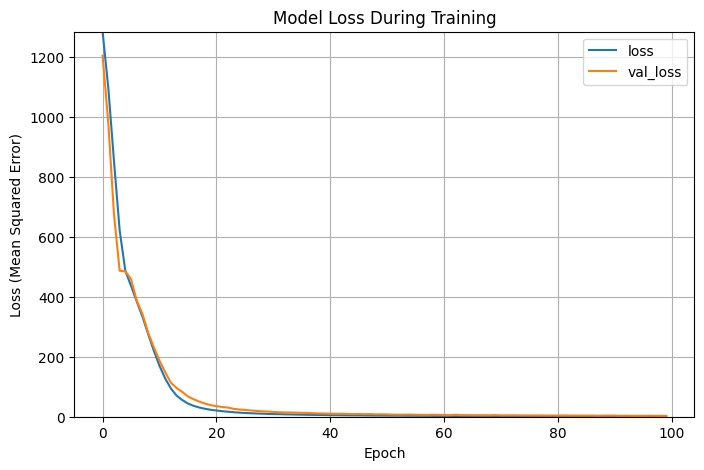

In [59]:
# Convert the history.history dict to a pandas DataFrame and plot the loss
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(8, 5))
plt.grid(True)
# Adjust the y-axis limits to the range of loss values for regression task
plt.gca().set_ylim(0, history_df['loss'].max())  # Use the maximum value of training loss to set the upper limit
plt.title("Model Loss During Training")
plt.ylabel("Loss (Mean Squared Error)")
plt.xlabel("Epoch")
# plt.savefig("keras_learning_curves_plot.png")
plt.show()

## MLP + Selected Features

In [60]:
# List of selected features
selected_features = [
    'Ethnicity', 'T_atm', 'T_offset1', 'Max1R13_1', 'aveAllL13_1',
    'T_RC1', 'T_FHCC1', 'T_FHRC1', 'T_FHBC1', 'T_FH_Max1', 'T_Max1', 'T_OR1'
]

# Select the specified features from the training data
X_train_selected = X_train[selected_features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

# Model structure
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=1)

train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Training Mean Squared Error: {train_mse}")

y_train_pred = model.predict(X_train_scaled)

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 1326.7034 - val_loss: 1254.4257
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1195.6133 - val_loss: 1084.8790
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 982.9815 - val_loss: 830.1369
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 698.3281 - val_loss: 584.4487
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 471.3517 - val_loss: 469.5144
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 372.8621 - val_loss: 393.8396
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 309.2880 - val_loss: 311.2537
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 246.2720 - val_loss: 243.7664
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 190.7318 - val_loss: 183.0524
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - 

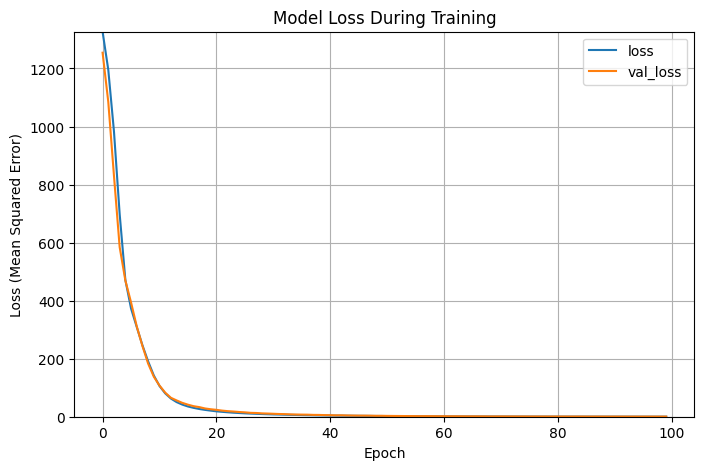

In [61]:
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(8, 5))
plt.grid(True)

plt.gca().set_ylim(0, history_df['loss'].max())
plt.title("Model Loss During Training")
plt.ylabel("Loss (Mean Squared Error)")
plt.xlabel("Epoch")

plt.show()

## MLP + Selected Features with Early Stopping and L1+L2

In [62]:
selected_features = [
    'Ethnicity', 'T_atm', 'T_offset1', 'Max1R13_1', 'aveAllL13_1',
    'T_RC1', 'T_FHCC1', 'T_FHRC1', 'T_FHBC1', 'T_FH_Max1', 'T_Max1', 'T_OR1'
]

X_train_selected = X_train[selected_features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

# Model structure with L1 and L2 regularization
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu',
                kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))  # L1 and L2 penalties on the layer's weights
model.add(Dense(32, activation='relu',
                kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Initialize early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

# Evaluate the model on the training data
train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Training Mean Squared Error: {train_mse}")

# Predictions
y_train_pred = model.predict(X_train_scaled)

Epoch 1/100
23/23 [==============================] - 1s 11ms/step - loss: 1298.1843 - val_loss: 1232.1842
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1146.6028 - val_loss: 1046.4034
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 924.9079 - val_loss: 776.1121
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 665.9371 - val_loss: 505.0581
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 451.0773 - val_loss: 386.5475
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 338.4622 - val_loss: 353.2049
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 276.7616 - val_loss: 295.7046
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 220.6919 - val_loss: 226.6321
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 172.9041 - val_loss: 176.4826
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - 

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Best Model Evaluation

In [64]:
data = {
    "Fast Mode Model": [
        "Linear Regression", "SGD Linear Regression", "Polynomial Regression",
        "Decision Tree", "KNN", "Random Forest",
        "XGBoost", "MLP", "MLP + Selected Features", "MLP + Selected Features with Early Stopping and L1+L2"
    ],
    "Fast Mode RMSE": [
        0.200, 0.214, 0.204, 0.166, 0.235, 0.081,
        0.075, 1.063, 0.368, 4.418
    ]
}

df = pd.DataFrame(data)

df_sorted = df.sort_values("Fast Mode RMSE")

df_sorted

,Fast Mode Model,Fast Mode RMSE
6,XGBoost,0.075
5,Random Forest,0.081
3,Decision Tree,0.166
0,Linear Regression,0.200
2,Polynomial Regression,0.204
1,SGD Linear Regression,0.214
4,KNN,0.235
8,MLP + Selected Features,0.368
7,MLP,1.063
9,MLP + Selected Features with Early Stopping an...,4.418


# Grid Search: XGBoost (best model)

In [65]:
# Setup the parameters from param_grid
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.005, 0.01, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1]
}

xgb = XGBRegressor(random_state=42)

# Instantiate the GridSearchCV object as grid_search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1,
                           n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and the corresponding score
best_param = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Prediction on the test set with the best model and calculate RMSE
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Best parameters found: ", best_param)
print("Lowest RMSE found: ", best_score)
print("RMSE on training set: ", rmse)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Lowest RMSE found:  0.23303594277964346
RMSE on training set:  0.18692736734810955


In [66]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Random Search: XGBoost

In [67]:
# # Setup the parameters from distribs
param_distribs = {
    'max_depth': randint(low=3, high=10),
    'learning_rate': uniform(0.005, 0.015),
    'n_estimators': randint(100, 500),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.4, 0.6)
}

# XGBRegressor model
xgb = XGBRegressor(random_state=42)

# RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_distribs,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                   verbose=1, n_jobs=-1, random_state=42)

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Retrieve the best parameters and the corresponding score
best_param = random_search.best_params_
best_score = np.sqrt(-random_search.best_score_)

# Prediction on the test set with the best model and calculate RMSE
best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Best parameters found: ", best_param)
print("Lowest RMSE found: ", best_score)
print("RMSE on test set: ", rmse)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'colsample_bytree': 0.9693313223519999, 'learning_rate': 0.01948448049611839, 'max_depth': 4, 'n_estimators': 364, 'subsample': 0.6063865008880857}
Lowest RMSE found:  0.23653126312623274
RMSE on test set:  0.12886209789474454


In [68]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9693313223519999, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01948448049611839, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=364, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [69]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00317938, 0.00621015, 0.01339496, 0.01108304, 0.01718231,
       0.00808858, 0.01389863, 0.00903308, 0.01115026, 0.00876765,
       0.00991218, 0.01559954, 0.02744279, 0.03465474, 0.0355946 ,
       0.01582187, 0.01521487, 0.01039608, 0.01084161, 0.01429587,
       0.01463283, 0.08865626, 0.02104758, 0.01368729, 0.01470858,
       0.01481531, 0.02010874, 0.01330433, 0.03505236, 0.0147712 ,
       0.16811416, 0.1514356 , 0.13790362], dtype=float32)

In [70]:
print(X_train.columns)

Index(['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance',
       'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1',
       'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1',
       'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1',
       'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1',
       'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1'],
      dtype='object')


In [71]:
# the best predictor and the important feature
best_estimator = grid_search.best_estimator_

feature_importance = best_estimator.feature_importances_
features = X_train.columns
importance = zip(features, feature_importance)
sorted_importance = sorted(importance, key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

T_Max1: 0.16811415553092957
T_OR1: 0.15143559873104095
T_OR_Max1: 0.1379036158323288
canthiMax1: 0.08865626156330109
T_RC_Max1: 0.035594597458839417
T_FH_Max1: 0.035052355378866196
T_RC_Wet1: 0.03465473651885986
T_RC_Dry1: 0.027442792430520058
canthi4Max1: 0.021047580987215042
T_FHBC1: 0.02010873705148697
Humidity: 0.017182309180498123
T_LC1: 0.015821870416402817
T_RC1: 0.015599544160068035
T_LC_Dry1: 0.015214874409139156
T_FHLC1: 0.014815308153629303
T_FHC_Max1: 0.014771204441785812
T_FHRC1: 0.014708582311868668
LCC1: 0.014632833190262318
RCC1: 0.014295865781605244
T_offset1: 0.013898629695177078
T_FHCC1: 0.013687292113900185
Ethnicity: 0.013394962064921856
T_FHTC1: 0.013304327614605427
Max1L13_1: 0.011150263249874115
T_atm: 0.011083042249083519
T_LC_Max1: 0.0108416136354208
T_LC_Wet1: 0.010396077297627926
aveAllL13_1: 0.009912176989018917
Max1R13_1: 0.009033079259097576
aveAllR13_1: 0.008767654187977314
Distance: 0.008088577538728714
Age: 0.006210153456777334
Gender: 0.00317938020452

# Run on test set

In [72]:
# Evaluate the best model on the test set by Grid Search model

final_best_model = grid_search.best_estimator_

# Predict on test set
test_predictions = final_best_model.predict(X_test)

# RMSE
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

print(test_rmse)

0.22327646773196427


# aveOralM_Regression

# Feature Selection

In [73]:
reg_f = combined_df_encoded.copy()
reg_m = combined_df_encoded.copy()
class_f = combined_df_encoded.copy()
class_m = combined_df_encoded.copy()

X = reg_f.drop(['aveOralF', 'aveOralM', 'Fever_aveOralF', 'Fever_aveOralM'], axis=1)
y = reg_f['aveOralM']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

p_value_threshold = 0.05
variables = X.columns.tolist()
while len(variables) > 0:
        model = sm.OLS(y, X[variables]).fit()
    p_values = model.pvalues
    max_p_value_var = p_values.idxmax()
    max_p_value = p_values.max()

    if max_p_value > p_value_threshold:
        variables.remove(max_p_value_var)

    else:
        break

final_features = variables
print('Selected features for aveOralF Regression:', final_features)

Selected features for aveOralF Regression: ['const', 'Gender', 'Ethnicity', 'T_atm', 'T_offset1', 'Max1R13_1', 'aveAllL13_1', 'T_RC_Max1', 'LCC1', 'T_FHCC1', 'T_FHLC1', 'T_FHBC1', 'T_FH_Max1', 'T_Max1', 'T_OR1']


In [74]:
from sklearn.preprocessing import StandardScaler

# List of columns to exclude from standardization, including binary indicators and label-encoded categorical columns
columns_to_exclude = ['aveOralF', 'aveOralM', 'Fever_aveOralF', 'Fever_aveOralM', 'Age', 'Gender', 'Ethnicity']

# Selecting the columns that need to be standardized, excluding the label-encoded categorical columns and binary indicators
columns_to_scale = [col for col in combined_df_encoded.columns if col not in columns_to_exclude]

# Instantiating the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data for the specified columns
combined_df_encoded[columns_to_scale] = scaler.fit_transform(combined_df_encoded[columns_to_scale])

# Now 'combined_df_encoded' has the standardized columns except the ones we excluded
print(combined_df_encoded.head())  # Display the first few rows to verify

   Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
0       1    5          5 -0.086392 -0.055341  2.178928  -0.734385  -0.985950   
1       0    4          2 -0.086392 -0.208419  2.178928  -0.520538  -1.821305   
2       0    2          5 -0.086392 -0.208419  2.178928  -0.292895   0.097401   
3       0    2          2 -0.086392 -0.131880  2.178928  -0.106642  -0.650938   
4       1    0          5 -0.086392 -0.131880  2.178928  -0.203217  -0.089684   

   Max1L13_1  aveAllR13_1  ...   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1  \
0  -0.425802    -0.680080  ... -2.162224  -1.703974   -1.887314 -0.798009   
1  -1.986339    -1.334438  ... -0.789203  -1.412510   -0.754033 -1.850738   
2  -0.171020    -0.850631  ...  0.127288  -0.146314    0.222933 -0.350472   
3   0.001867    -0.700964  ...  0.467111   0.345830    0.383589 -0.742067   
4   0.097411     0.029969  ... -1.029482  -0.007750    0.483457 -0.386072   

      T_OR1  T_OR_Max1  aveOralF  aveOralM  Fever_

# Random Sampling for Regression Model

In [75]:
X = combined_df_encoded.drop(['aveOralM', 'Fever_aveOralM', 'aveOralF', 'Fever_aveOralF'], axis=1)
y = combined_df_encoded['aveOralM']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(X_train.head())
print(y_train.head())

     Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  \
743       0    0          5 -0.236128 -0.330882 -0.040324   0.831524   
137       0    1          2 -0.011524 -0.216073  2.030978  -0.010066   
799       1    1          5  3.357541  1.567288 -0.780074   4.322053   
933       1    1          2 -0.161260 -0.721231 -0.188274  -0.175624   
822       0    0          5  0.287949 -0.430382 -0.780074   0.390035   

     Max1R13_1  Max1L13_1  aveAllR13_1  ...   T_FHCC1   T_FHRC1   T_FHLC1  \
743   0.255481   0.203569     0.299137  ...  0.921647  0.845265  1.245204   
137   0.206171  -0.384855     0.499854  ... -0.314470 -0.530999 -0.217947   
799   4.326387   4.424148     3.740320  ...  3.795590  3.747254  3.832438   
933   0.658655   1.248477     0.478970  ...  0.946444  1.131728  1.020388   
822  -0.107087  -0.726080    -0.196272  ... -1.467519 -1.509953 -1.471023   

      T_FHBC1   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  
743  0.916976  0.992291 

# Linear Regression

In [76]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [77]:
y_train_pred = linear_model.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Training RMSE:", train_rmse)

Training RMSE: 0.2551275526478101


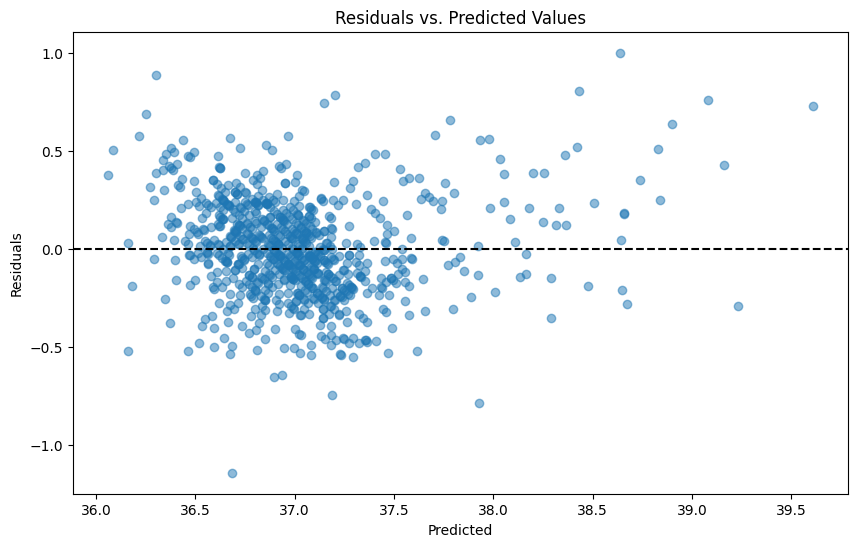

In [78]:
residuals = y_train - y_train_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

In [79]:
comparison_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
print(comparison_df.head())

     Actual  Predicted
743   36.94  37.089336
137   36.84  36.911955
799   39.54  38.901992
933   37.94  37.924676
822   36.89  36.658093


In [80]:
linear_model_cv = LinearRegression()

cv_scores = cross_val_score(linear_model_cv, X, y, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

cv_rmse = np.sqrt(-cv_scores)

print("Cross-validation RMSE scores:", cv_rmse)
print("Mean RMSE:", cv_rmse.mean())
print("Standard deviation of RMSE:", cv_rmse.std())

Cross-validation RMSE scores: [0.24681778 0.28168041 0.22089064 0.23778269 0.24371263 0.23838789
 0.31371676 0.27309627 0.28714018 0.26872236]
Mean RMSE: 0.2611947599787424
Standard deviation of RMSE: 0.02693458895177593


# SGD Linear Regression

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

sgd_regressor.fit(X_train_scaled, y_train)

SGDRegressor(random_state=42)

In [82]:
y_train_pred_sgd = sgd_regressor.predict(X_train_scaled)

train_rmse_sgd = np.sqrt(mean_squared_error(y_train, y_train_pred_sgd))

print("Training RMSE (SGD):", train_rmse_sgd)

Training RMSE (SGD): 0.2724711594798056


In [83]:
comparison_df_sgd = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_sgd})
print(comparison_df_sgd.head())

     Actual  Predicted
743   36.94  37.031631
137   36.84  36.864576
799   39.54  38.763135
933   37.94  37.903252
822   36.89  36.886071


In [84]:
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

cv_scores = cross_val_score(linear_model_cv, X, y, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

cv_rmse = np.sqrt(-cv_scores)

print("Cross-validation RMSE scores:", cv_rmse)
print("Mean RMSE:", cv_rmse.mean())
print("Standard deviation of RMSE:", cv_rmse.std())

Cross-validation RMSE scores: [0.24681778 0.28168041 0.22089064 0.23778269 0.24371263 0.23838789
 0.31371676 0.27309627 0.28714018 0.26872236]
Mean RMSE: 0.2611947599787424
Standard deviation of RMSE: 0.02693458895177593


# Polynomial Regression

In [85]:
features_select_fR = X_train[['Gender', 'Ethnicity', 'T_atm', 'T_offset1', 'Max1R13_1', 'aveAllL13_1', 'T_RC_Max1', 'LCC1', 'T_FHCC1', 'T_FHLC1', 'T_FHBC1', 'T_FH_Max1', 'T_Max1', 'T_OR1']]

In [86]:
features_select_fR

,Gender,Ethnicity,T_atm,T_offset1,Max1R13_1,aveAllL13_1,T_RC_Max1,LCC1,T_FHCC1,T_FHLC1,T_FHBC1,T_FH_Max1,T_Max1,T_OR1
743,0,5,-0.236128,0.831524,0.255481,0.271478,0.217301,0.646639,0.921647,1.245204,0.916976,0.761524,-0.009734,-0.325922
137,0,2,-0.011524,-0.010066,0.206171,-0.077100,0.126938,-0.730108,-0.314470,-0.217947,-0.063949,-0.896476,-0.106361,0.307667
799,1,5,3.357541,4.322053,4.326387,4.212387,4.437261,4.482982,3.795590,3.832438,4.080646,4.932803,4.191009,3.702218
933,1,2,-0.161260,-0.175624,0.658655,0.779219,0.709780,1.392793,0.946444,1.020388,1.021808,1.382677,1.927897,2.123461
822,0,5,0.287949,0.390035,-0.107087,-0.258624,-0.257105,-0.516106,-1.467519,-1.471023,-1.509128,-0.538118,-1.001435,-0.788070
765,1,5,0.737157,1.500657,1.224260,1.702623,1.107378,1.486953,1.058030,1.060928,1.194031,0.646850,1.231163,1.251344
261,1,5,1.036630,0.334848,3.438822,4.200548,3.402602,4.221900,2.995895,2.037591,3.009866,3.571045,3.779072,2.847990
567,1,5,-0.460732,0.038222,0.001683,0.747650,-0.076379,0.930548,-0.087580,0.360680,-0.172524,-0.657571,-0.106361,-0.470530
832,0,5,-0.236128,0.107205,0.771776,1.201459,0.664599,0.759346,0.329005,0.463874,0.299218,0.350608,0.570029,0.428422
381,0,2,-2.482171,-1.355230,0.114804,0.775273,-0.049270,0.040300,-1.103006,-0.118438,-0.681707,0.460504,1.337962,1.613608


In [87]:
selected_features = ['Gender', 'Ethnicity', 'T_atm', 'T_offset1', 'Max1R13_1', 'aveAllL13_1', 'T_RC_Max1', 'LCC1', 'T_FHCC1', 'T_FHLC1', 'T_FHBC1', 'T_FH_Max1', 'T_Max1', 'T_OR1']

X_train_selected = X_train[selected_features]

poly_regression_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

poly_regression_pipeline.fit(X_train_selected, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [88]:
y_train_pred = poly_regression_pipeline.predict(X_train_selected)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Training RMSE:", train_rmse)

Training RMSE: 0.219639254494364


In [89]:
comparison_df_poly = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

print(comparison_df_poly.head())

     Actual  Predicted
743   36.94  36.992917
137   36.84  36.795633
799   39.54  39.675489
933   37.94  37.829287
822   36.89  36.578804


In [90]:
cv_scores = cross_val_score(poly_regression_pipeline, X_train_selected, y_train, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

cv_scores_positive = -cv_scores

cv_rmse_scores = np.sqrt(cv_scores_positive)

print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())
print("Standard Deviation of RMSE:", cv_rmse_scores.std())

Cross-validation RMSE scores: [0.28775037 0.26341723 0.26422211 0.23315587 0.28140059 0.27120875
 0.2909683  0.30485379 0.29812966 0.28340872]
Mean RMSE: 0.27785154068339485
Standard Deviation of RMSE: 0.01972252045145732


# Decision Tree

In [91]:
dtr_regressor = DecisionTreeRegressor(random_state=42)

dtr_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [92]:
y_train_pred = dtr_regressor.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Training RMSE:", train_rmse)

print("Decision Tree depth:", dtr_regressor.get_depth())
print("Number of leaves:", dtr_regressor.get_n_leaves())

Training RMSE: 0.0
Decision Tree depth: 23
Number of leaves: 650


In [93]:
dtr_regressor2 = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr_regressor2.fit(X_train, y_train)
y_train_pred = dtr_regressor2.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Training RMSE:", train_rmse)
print("Decision Tree depth:", dtr_regressor2.get_depth())
print("Number of leaves:", dtr_regressor2.get_n_leaves())

Training RMSE: 0.21618625066854608
Decision Tree depth: 5
Number of leaves: 30


In [94]:
cv_scores = cross_val_score(poly_regression_pipeline, X_train_selected, y_train, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

cv_scores_positive = -cv_scores

cv_rmse_scores = np.sqrt(cv_scores_positive)

print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())
print("Standard Deviation of RMSE:", cv_rmse_scores.std())

Cross-validation RMSE scores: [0.28775037 0.26341723 0.26422211 0.23315587 0.28140059 0.27120875
 0.2909683  0.30485379 0.29812966 0.28340872]
Mean RMSE: 0.27785154068339485
Standard Deviation of RMSE: 0.01972252045145732


# KNN

In [95]:
knn_regressor = KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [96]:
F_prediction_KNN = knn_regressor.predict(X_train)
F_KNN_mse = mean_squared_error(y_train, F_prediction_KNN)
F_KNN_rmse = np.sqrt(F_KNN_mse)
F_KNN_rmse

0.0

In [97]:
knn_regressor2 = KNeighborsRegressor(n_neighbors=14)
knn_regressor2.fit(X_train, y_train)
F_prediction_KNN2 = knn_regressor2.predict(X_train)
F_KNN_mse2 = mean_squared_error(y_train, F_prediction_KNN2)
F_KNN_rmse2 = np.sqrt(F_KNN_mse2)
F_KNN_rmse2

0.2558304950487309

In [98]:
knn_regressor = KNeighborsRegressor(n_neighbors=1)

cv_scores_knn = cross_val_score(knn_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

cv_rmse_scores_knn = np.sqrt(-cv_scores_knn)

print("Cross-validation RMSE scores for KNN (n_neighbors=1):", np.round(cv_rmse_scores_knn, 2))
print("Mean RMSE:", round(cv_rmse_scores_knn.mean(), 2))
print("Standard deviation of RMSE:", round(cv_rmse_scores_knn.std(), 2))

knn_regressor2 = KNeighborsRegressor(n_neighbors=14)

cv_scores_knn2 = cross_val_score(knn_regressor2, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

cv_rmse_scores_knn2 = np.sqrt(-cv_scores_knn2)

print("\nCross-validation RMSE scores for KNN (n_neighbors=14):", np.round(cv_rmse_scores_knn2, 2))
print("Mean RMSE:", round(cv_rmse_scores_knn2.mean(), 2))
print("Standard deviation of RMSE:", round(cv_rmse_scores_knn2.std(), 2))

Cross-validation RMSE scores for KNN (n_neighbors=1): [0.36 0.36 0.34 0.3  0.43 0.37 0.38 0.38 0.37 0.39]
Mean RMSE: 0.37
Standard deviation of RMSE: 0.03

Cross-validation RMSE scores for KNN (n_neighbors=14): [0.26 0.27 0.24 0.24 0.32 0.25 0.34 0.27 0.29 0.3 ]
Mean RMSE: 0.28
Standard deviation of RMSE: 0.03


# Random Forest

In [99]:
F_RF_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
F_RF_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [100]:
F_RF_pred = F_RF_regressor.predict(X_train)
F_RF_mse = mean_squared_error(y_train, F_RF_pred)
F_RF_rmse = np.sqrt(F_RF_mse)
F_RF_rmse

0.09668307839047666

In [101]:
F_RF_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(F_RF_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

cv_rmse_scores = np.sqrt(-cv_scores)

print("Cross-validation RMSE scores:", np.round(cv_rmse_scores, 2))
print("Mean RMSE:", round(cv_rmse_scores.mean(), 2))
print("Standard deviation of RMSE:", round(cv_rmse_scores.std(), 2))

Cross-validation RMSE scores: [0.24 0.22 0.23 0.23 0.28 0.24 0.29 0.3  0.29 0.24]
Mean RMSE: 0.26
Standard deviation of RMSE: 0.03


# XGBoost

In [104]:
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [105]:
xgb_pred = xgb_regressor.predict(X_train)
xgb_mse = mean_squared_error(y_train, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

0.0038701783549520154

In [106]:
xgb_regressor2 = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)
xgb_regressor2.fit(X_train, y_train)
xgb_predictions2 = xgb_regressor2.predict(X_train)
xgb_mse2 = mean_squared_error(y_train, xgb_predictions2)
xgb_rmse2 = np.sqrt(xgb_mse2)
xgb_rmse2

0.09074137019615512

In [107]:
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)

cv_scores_xgb = cross_val_score(xgb_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

cv_rmse_scores_xgb = np.sqrt(-cv_scores_xgb)

print("Cross-validation RMSE scores for XGBoost Model 1:", np.round(cv_rmse_scores_xgb, 2))
print("Mean RMSE for XGBoost Model 1:", round(cv_rmse_scores_xgb.mean(), 2))
print("Standard deviation of RMSE for XGBoost Model 1:", round(cv_rmse_scores_xgb.std(), 2))

xgb_reg2 = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)

cv_scores_xgb2 = cross_val_score(xgb_reg2, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

cv_rmse_scores_xgb2 = np.sqrt(-cv_scores_xgb2)

print("\nCross-validation RMSE scores for XGBoost Model 2:", np.round(cv_rmse_scores_xgb2, 2))
print("Mean RMSE for XGBoost Model 2:", round(cv_rmse_scores_xgb2.mean(), 2))
print("Standard deviation of RMSE for XGBoost Model 2:", round(cv_rmse_scores_xgb2.std(), 2))


Cross-validation RMSE scores for XGBoost Model 1: [0.29 0.23 0.24 0.24 0.29 0.26 0.29 0.3  0.31 0.26]
Mean RMSE for XGBoost Model 1: 0.27
Standard deviation of RMSE for XGBoost Model 1: 0.03

Cross-validation RMSE scores for XGBoost Model 2: [0.28 0.22 0.26 0.24 0.29 0.25 0.29 0.28 0.31 0.26]
Mean RMSE for XGBoost Model 2: 0.27
Standard deviation of RMSE for XGBoost Model 2: 0.02


# MLP

## MLP

In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

istory = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=1)

train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Training Mean Squared Error: {train_mse}")

y_train_pred = model.predict(X_train_scaled)

Epoch 1/100
23/23 [==============================] - 1s 9ms/step - loss: 1297.8774 - val_loss: 1214.1210
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1083.4337 - val_loss: 917.6537
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 734.7802 - val_loss: 535.7397
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 493.6463 - val_loss: 471.4801
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 424.4699 - val_loss: 428.0236
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 361.5968 - val_loss: 357.0869
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 292.9494 - val_loss: 287.0523
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 227.1989 - val_loss: 226.2628
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 165.2155 - val_loss: 171.7486
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - lo

In [109]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                2176      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


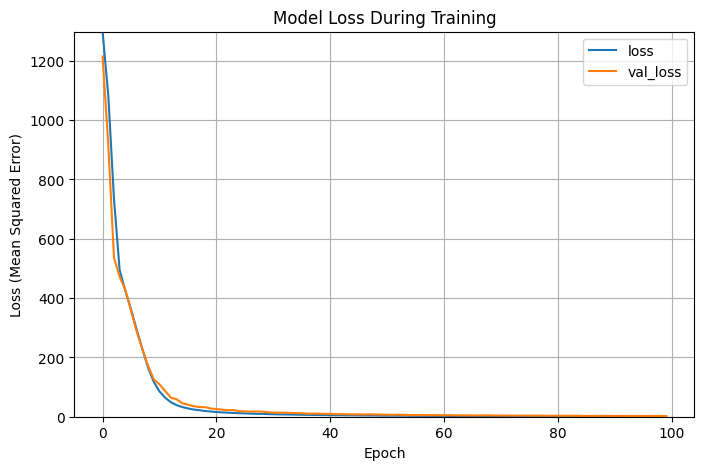

In [110]:
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(8, 5))
plt.grid(True)

plt.gca().set_ylim(0, history_df['loss'].max())
plt.title("Model Loss During Training")
plt.ylabel("Loss (Mean Squared Error)")
plt.xlabel("Epoch")

plt.show()

## MLP + Selected Features

In [111]:
selected_features = ['Gender', 'Ethnicity', 'T_atm', 'T_offset1', 'Max1R13_1',
                     'aveAllL13_1', 'T_RC_Max1', 'LCC1', 'T_FHCC1', 'T_FHLC1',
                     'T_FHBC1', 'T_FH_Max1', 'T_Max1', 'T_OR1'
]

X_train_selected = X_train[selected_features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=1)

train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Training Mean Squared Error: {train_mse}")

y_train_pred = model.predict(X_train_scaled)

Epoch 1/100
23/23 [==============================] - 1s 9ms/step - loss: 1292.1792 - val_loss: 1215.8916
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1132.9630 - val_loss: 1006.0214
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 870.8513 - val_loss: 692.9039
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 559.4324 - val_loss: 442.2180
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 376.6456 - val_loss: 386.7795
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 316.4838 - val_loss: 331.6260
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 254.3902 - val_loss: 262.6785
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 195.7312 - val_loss: 197.1362
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 141.9760 - val_loss: 147.8362
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - l

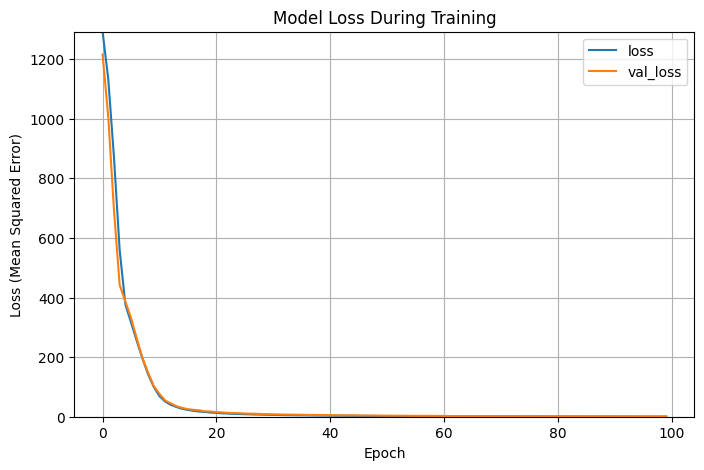

In [112]:
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(8, 5))
plt.grid(True)

plt.gca().set_ylim(0, history_df['loss'].max())
plt.title("Model Loss During Training")
plt.ylabel("Loss (Mean Squared Error)")
plt.xlabel("Epoch")

plt.show()

## MLP + Selected Features with Early Stopping and L1+L2

In [113]:
selected_features = [
    'Ethnicity', 'T_atm', 'T_offset1', 'Max1R13_1', 'aveAllL13_1',
    'T_RC1', 'T_FHCC1', 'T_FHRC1', 'T_FHBC1', 'T_FH_Max1', 'T_Max1', 'T_OR1'
]

X_train_selected = X_train[selected_features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu',
                kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(32, activation='relu',
                kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Training Mean Squared Error: {train_mse}")

y_train_pred = model.predict(X_train_scaled)

Epoch 1/100
23/23 [==============================] - 2s 11ms/step - loss: 1306.2769 - val_loss: 1231.6676
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1155.2983 - val_loss: 1047.7194
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 938.3964 - val_loss: 782.6649
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 674.5925 - val_loss: 511.2628
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 452.3933 - val_loss: 373.4331
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 338.6744 - val_loss: 345.3092
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 281.8302 - val_loss: 293.2164
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 232.0063 - val_loss: 247.2817
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 186.9762 - val_loss: 195.4704
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - 

In [114]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                832       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Best Model Evaluation

In [115]:
data = {
    "Monitor Mode Model": [
        "Linear Regression", "SGD Linear Regression", "Polynomial Regression",
        "Decision Tree", "KNN", "Random Forest",
        "XGBoost", "MLP", "MLP + Selected Features", "MLP + Selected Features with Early Stopping and L1+L2"
    ],
    "Monitor Mode RMSE": [
        0.226, 0.239, 0.220, 0.199, 0.254, 0.090,
        0.003, 1.007, 0.335, 4.088
    ]
}

df = pd.DataFrame(data)

df_sorted = df.sort_values("Monitor Mode RMSE")

df_sorted

,Monitor Mode Model,Monitor Mode RMSE
6,XGBoost,0.003
5,Random Forest,0.090
3,Decision Tree,0.199
2,Polynomial Regression,0.220
0,Linear Regression,0.226
1,SGD Linear Regression,0.239
4,KNN,0.254
8,MLP + Selected Features,0.335
7,MLP,1.007
9,MLP + Selected Features with Early Stopping an...,4.088


# Grid Search: XGBoost (best model)

In [116]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.005, 0.01, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Best parameters found: ", best_param)
print("Lowest RMSE found: ", best_score)
print("RMSE on training set: ", rmse)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Lowest RMSE found:  0.2538890960465614
RMSE on training set:  0.16346074852057987


In [117]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

# Random Search: XGBoost

In [118]:
param_distribs = {
    'max_depth': randint(low=3, high=10),
    'learning_rate': uniform(0.005, 0.015),
    'n_estimators': randint(100, 500),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.4, 0.6)
}

xgb = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_distribs,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                   verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_param = random_search.best_params_
best_score = np.sqrt(-random_search.best_score_)

best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Best parameters found: ", best_param)
print("Lowest RMSE found: ", best_score)
print("RMSE on test set: ", rmse)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'colsample_bytree': 0.9693313223519999, 'learning_rate': 0.01948448049611839, 'max_depth': 4, 'n_estimators': 364, 'subsample': 0.6063865008880857}
Lowest RMSE found:  0.25442679813394764
RMSE on test set:  0.1484098543902721


In [119]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9693313223519999, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01948448049611839, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=364, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Run on test set

In [123]:
final_best_model = grid_search.best_estimator_

test_predictions = final_best_model.predict(X_test)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

print(test_rmse)

0.22456635510697695


# aveOralF_Classification

In [124]:
X = combined_df_encoded.drop(['aveOralF', 'Fever_aveOralF','Fever_aveOralM', 'aveOralM'], axis=1)
y = combined_df_encoded['Fever_aveOralF']

strf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in strf_split.split(X, combined_df_encoded['Fever_aveOralF']):
    X_train = X.loc[train_index]
    y_train = y[train_index]
    X_test = X.loc[test_index]
    y_test = y[test_index]

# Logistic Regression

In [125]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

The CV results shows that the model performance is conservative on different tranining set, but the ROC threshold and related TP rate and FP rate are very close to the results of a single training set, indicating that the model is good at for balancing precision and recall, which means identifying positive and negative classes.

## We check the threshold for classification.
1. The decision score of the traning regression reflects the degree of confidence that a sample is positive class.
2. Next, we cauculate the precision and recall rate, and gain its thresholds.
3. The code remove the last unit from precision and recall so that the shape of threshoold array could be matched. For example, if the threshold of mius is umlimited, then the model predicts all examples are positive, making the recall is 1.
4. precision_recall_curve adds one extra point(precision and recall) for this extreme situation.
5. Adding np.finfo(float).eps, a little trick to prevent divide-by-zero errors.
6. Lastly, using ROC_curve to all point on ROC curve(FPR and TPR), and then calculates the Euclidean distance from these points to the (0,1) point (the ideally optimize point), then find the point closest to (0,1), then we find the best classification threshold, balancing the TP and FP rate.

In [126]:
# calculate the decision function or predicted probability of the model on the training set
y_scores = log_reg.decision_function(X_train)

# calculate precision, recall and threshold
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

# remove the last unit in precision and recall to fit the thresholds shape
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
precisions, recalls = precisions[:-1], recalls[:-1]

# calculate F1 scores for all thresholds that the denominator is zero
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + np.finfo(float).eps)

# find the index corresponding to the maximum F1 score
best_f1_index = np.argmax(f1_scores)
best_threshold_for_f1 = thresholds[best_f1_index]
best_f1_score = f1_scores[best_f1_index]

print(f"Best F1 Score: {best_f1_score}")
print(f"Best Threshold for F1 Score: {best_threshold_for_f1}")

# use roc_curve to find optimal classification threshold
fpr, tpr, roc_thresholds = roc_curve(y_train, y_scores)

# calculate the Euclidean distance between the TP rate and FP rate for each threshold
distances = np.sqrt((0 - fpr) ** 2 + (1 - tpr) ** 2)

# Find the index of minimum distance
best_threshold_index = np.argmin(distances)
best_threshold_for_roc = roc_thresholds[best_threshold_index]
best_fpr = fpr[best_threshold_index]
best_tpr = tpr[best_threshold_index]

print(f"Best Threshold for ROC: {best_threshold_for_roc}")
print(f"Best FPR for ROC: {best_fpr}")
print(f"Best TPR for ROC: {best_tpr}")

Best F1 Score: 0.8118811881188118
Best Threshold for F1 Score: -1.204159050518209
Best Threshold for ROC: -2.313213422182966
Best FPR for ROC: 0.03766233766233766
Best TPR for ROC: 0.9565217391304348


In [127]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores_cv = cross_val_predict(log_reg, X, y, cv=cv_strategy, method='decision_function')

precisions_cv, recalls_cv, thresholds_cv = precision_recall_curve(y, y_scores_cv)

f1_scores_cv = 2 * (precisions_cv * recalls_cv) / (precisions_cv + recalls_cv + np.finfo(float).eps)

best_f1_index_cv = np.argmax(f1_scores_cv)
best_threshold_for_f1_cv = thresholds_cv[best_f1_index_cv]
best_f1_score_cv = f1_scores_cv[best_f1_index_cv]

print(f"Cross-validated Best F1 Score: {best_f1_score_cv}")
print(f"Cross-validated Best Threshold for F1 Score: {best_threshold_for_f1_cv}")

fpr_cv, tpr_cv, roc_thresholds_cv = roc_curve(y, y_scores_cv)

distances_cv = np.sqrt((0 - fpr_cv) ** 2 + (1 - tpr_cv) ** 2)

best_threshold_index_cv = np.argmin(distances_cv)
best_threshold_for_roc_cv = roc_thresholds_cv[best_threshold_index_cv]
best_fpr_cv = fpr_cv[best_threshold_index_cv]
best_tpr_cv = tpr_cv[best_threshold_index_cv]

print(f"Cross-validated Best Threshold for ROC: {best_threshold_for_roc_cv}")
print(f"Cross-validated Best FPR for ROC: {best_fpr_cv}")
print(f"Cross-validated Best TPR for ROC: {best_tpr_cv}")

Cross-validated Best F1 Score: 0.7499999999999999
Cross-validated Best Threshold for F1 Score: -0.3700382061618699
Cross-validated Best Threshold for ROC: -2.3032985972502438
Cross-validated Best FPR for ROC: 0.0395010395010395
Cross-validated Best TPR for ROC: 0.9137931034482759


# SVM for Classification

In [128]:
svm_clf = SVC(random_state=42, probability=True)

svm_clf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [129]:
# calculate the decision function or predicted probability of the model on the training set
y_scores_svm = svm_clf.decision_function(X_train)

# calculate precision and recall and thresholds
precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm)

# remove the last element in precision and recall to match the shape of thresholds
precisions_svm, recalls_svm = precisions_svm[:-1], recalls_svm[:-1]

# calculate F1 scores for all thresholds and handle cases where the denominator is zero
f1_scores_svm = 2 * (precisions_svm * recalls_svm) / (precisions_svm + recalls_svm + np.finfo(float).eps)

# find the index corresponding to the maximum F1 score
best_f1_index_svm = np.argmax(f1_scores_svm)
best_threshold_for_f1_svm = thresholds_svm[best_f1_index_svm]
best_f1_score_svm = f1_scores_svm[best_f1_index_svm]

print(f"SVM Best F1 Score: {best_f1_score_svm}")
print(f"SVM Best Threshold for F1 Score: {best_threshold_for_f1_svm}")

# use roc_curve to find optimal classification threshold
fpr_svm, tpr_svm, roc_thresholds_svm = roc_curve(y_train, y_scores_svm)

# calculate the distance between the TP rate and FP rate for each threshold
distances_svm = np.sqrt((0 - fpr_svm) ** 2 + (1 - tpr_svm) ** 2)

# find the index of minimum distance
best_threshold_index_svm = np.argmin(distances_svm)
best_threshold_for_roc_svm = roc_thresholds_svm[best_threshold_index_svm]
best_fpr_svm = fpr_svm[best_threshold_index_svm]
best_tpr_svm = tpr_svm[best_threshold_index_svm]

print(f"SVM Best Threshold for ROC: {best_threshold_for_roc_svm}")
print(f"SVM Best FPR for ROC: {best_fpr_svm}")
print(f"SVM Best TPR for ROC: {best_tpr_svm}")

SVM Best F1 Score: 0.8453608247422679
SVM Best Threshold for F1 Score: -0.6068283624371582
SVM Best Threshold for ROC: -0.9697306463380179
SVM Best FPR for ROC: 0.02727272727272727
SVM Best TPR for ROC: 0.9782608695652174


In [130]:
# cross-validation(CV) setting
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# initialized SVM
svm_clf = SVC(random_state=42, probability=True)

# CV prediction score for each sample
y_scores_cv_svm = cross_val_predict(svm_clf, X, y, cv=cv_strategy, method='decision_function')

# calculate CV estimates of precision, recall, and F1 score
precisions_cv_svm, recalls_cv_svm, thresholds_cv_svm = precision_recall_curve(y, y_scores_cv_svm)

# calculate F1 scores for all thresholds and handle the denominator that is zero
f1_scores_cv_svm = 2 * (precisions_cv_svm * recalls_cv_svm) / (precisions_cv_svm + recalls_cv_svm + np.finfo(float).eps)

# find the index corresponding to the maximum F1 score
best_f1_index_cv_svm = np.argmax(f1_scores_cv_svm)
best_threshold_for_f1_cv_svm = thresholds_cv_svm[best_f1_index_cv_svm]
best_f1_score_cv_svm = f1_scores_cv_svm[best_f1_index_cv_svm]

print(f"Cross-validated SVM Best F1 Score: {best_f1_score_cv_svm}")
print(f"Cross-validated SVM Best Threshold for F1 Score: {best_threshold_for_f1_cv_svm}")

# use roc_curve to find optimal classification threshold
fpr_cv_svm, tpr_cv_svm, roc_thresholds_cv_svm = roc_curve(y, y_scores_cv_svm)

# calculate the distance between the TP rate and FP rate for each threshold
distances_cv_svm = np.sqrt((0 - fpr_cv_svm) ** 2 + (1 - tpr_cv_svm) ** 2)

# find the index of minimum distance
best_threshold_index_cv_svm = np.argmin(distances_cv_svm)
best_threshold_for_roc_cv_svm = roc_thresholds_cv_svm[best_threshold_index_cv_svm]
best_fpr_cv_svm = fpr_cv_svm[best_threshold_index_cv_svm]
best_tpr_cv_svm = tpr_cv_svm[best_threshold_index_cv_svm]

print(f"Cross-validated SVM Best Threshold for ROC: {best_threshold_for_roc_cv_svm}")
print(f"Cross-validated SVM Best FPR for ROC: {best_fpr_cv_svm}")
print(f"Cross-validated SVM Best TPR for ROC: {best_tpr_cv_svm}")


Cross-validated SVM Best F1 Score: 0.7299270072992701
Cross-validated SVM Best Threshold for F1 Score: -0.7989087422438718
Cross-validated SVM Best Threshold for ROC: -0.954428890090115
Cross-validated SVM Best FPR for ROC: 0.062370062370062374
Cross-validated SVM Best TPR for ROC: 0.9137931034482759


# Decision Tree Classifier

In [131]:
decision_tree_clf = DecisionTreeClassifier(random_state=42)

decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [132]:
# use predict_proba to obtain the predicted probability
# because Decision Tree Classifier does not have decision_function
# predict_proba returns the probability of each category,
# we take the probability of the positive category (index 1)
y_scores_dt = decision_tree_clf.predict_proba(X_train)[:, 1]

precisions_dt, recalls_dt, thresholds_dt = precision_recall_curve(y_train, y_scores_dt)

precisions_dt, recalls_dt = precisions_dt[:-1], recalls_dt[:-1]

f1_scores_dt = 2 * (precisions_dt * recalls_dt) / (precisions_dt + recalls_dt + np.finfo(float).eps)

best_f1_index_dt = np.argmax(f1_scores_dt)
best_threshold_for_f1_dt = thresholds_dt[best_f1_index_dt]
best_f1_score_dt = f1_scores_dt[best_f1_index_dt]

print(f"Decision Tree Best F1 Score: {best_f1_score_dt}")
print(f"Decision Tree Best Threshold for F1 Score: {best_threshold_for_f1_dt}")

fpr_dt, tpr_dt, roc_thresholds_dt = roc_curve(y_train, y_scores_dt)

distances_dt = np.sqrt((0 - fpr_dt) ** 2 + (1 - tpr_dt) ** 2)

best_threshold_index_dt = np.argmin(distances_dt)
best_threshold_for_roc_dt = roc_thresholds_dt[best_threshold_index_dt]
best_fpr_dt = fpr_dt[best_threshold_index_dt]
best_tpr_dt = tpr_dt[best_threshold_index_dt]

print(f"Decision Tree Best Threshold for ROC: {best_threshold_for_roc_dt}")
print(f"Decision Tree Best FPR for ROC: {best_fpr_dt}")
print(f"Decision Tree Best TPR for ROC: {best_tpr_dt}")

Decision Tree Best F1 Score: 1.0
Decision Tree Best Threshold for F1 Score: 1.0
Decision Tree Best Threshold for ROC: 1.0
Decision Tree Best FPR for ROC: 0.0
Decision Tree Best TPR for ROC: 1.0


In [133]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores_cv_dt = cross_val_predict(decision_tree_clf, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

precisions_cv_dt, recalls_cv_dt, thresholds_cv_dt = precision_recall_curve(y, y_scores_cv_dt)

precisions_cv_dt, recalls_cv_dt = precisions_cv_dt[:-1], recalls_cv_dt[:-1]

f1_scores_cv_dt = 2 * (precisions_cv_dt * recalls_cv_dt) / (precisions_cv_dt + recalls_cv_dt + np.finfo(float).eps)

best_f1_index_cv_dt = np.argmax(f1_scores_cv_dt)
best_threshold_for_f1_cv_dt = thresholds_cv_dt[best_f1_index_cv_dt]
best_f1_score_cv_dt = f1_scores_cv_dt[best_f1_index_cv_dt]

print(f"Cross-validated Decision Tree Best F1 Score: {best_f1_score_cv_dt}")
print(f"Cross-validated Decision Tree Best Threshold for F1 Score: {best_threshold_for_f1_cv_dt}")

fpr_cv_dt, tpr_cv_dt, roc_thresholds_cv_dt = roc_curve(y, y_scores_cv_dt)

distances_cv_dt = np.sqrt((0 - fpr_cv_dt) ** 2 + (1 - tpr_cv_dt) ** 2)

best_threshold_index_cv_dt = np.argmin(distances_cv_dt)
best_threshold_for_roc_cv_dt = roc_thresholds_cv_dt[best_threshold_index_cv_dt]
best_fpr_cv_dt = fpr_cv_dt[best_threshold_index_cv_dt]
best_tpr_cv_dt = tpr_cv_dt[best_threshold_index_cv_dt]

print(f"Cross-validated Decision Tree Best Threshold for ROC: {best_threshold_for_roc_cv_dt}")
print(f"Cross-validated Decision Tree Best FPR for ROC: {best_fpr_cv_dt}")
print(f"Cross-validated Decision Tree Best TPR for ROC: {best_tpr_cv_dt}")

Cross-validated Decision Tree Best F1 Score: 0.5765765765765763
Cross-validated Decision Tree Best Threshold for F1 Score: 1.0
Cross-validated Decision Tree Best Threshold for ROC: 1.0
Cross-validated Decision Tree Best FPR for ROC: 0.02182952182952183
Cross-validated Decision Tree Best TPR for ROC: 0.5517241379310345


# Random Forest Classifier

In [134]:
random_forest_clf = RandomForestClassifier(random_state=42)

random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [135]:
# Random Forest Classifier also supports predict_proba
# so use it to obtain the predicted probability
# take the probability of the positive category (index 1)
y_scores_rf = random_forest_clf.predict_proba(X_train)[:, 1]

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf)

precisions_rf, recalls_rf = precisions_rf[:-1], recalls_rf[:-1]

f1_scores_rf = 2 * (precisions_rf * recalls_rf) / (precisions_rf + recalls_rf + np.finfo(float).eps)

best_f1_index_rf = np.argmax(f1_scores_rf)
best_threshold_for_f1_rf = thresholds_rf[best_f1_index_rf]
best_f1_score_rf = f1_scores_rf[best_f1_index_rf]

print(f"Random Forest Best F1 Score: {best_f1_score_rf}")
print(f"Random Forest Best Threshold for F1 Score: {best_threshold_for_f1_rf}")

fpr_rf, tpr_rf, roc_thresholds_rf = roc_curve(y_train, y_scores_rf)

distances_rf = np.sqrt((0 - fpr_rf) ** 2 + (1 - tpr_rf) ** 2)

best_threshold_index_rf = np.argmin(distances_rf)
best_threshold_for_roc_rf = roc_thresholds_rf[best_threshold_index_rf]
best_fpr_rf = fpr_rf[best_threshold_index_rf]
best_tpr_rf = tpr_rf[best_threshold_index_rf]

print(f"Random Forest Best Threshold for ROC: {best_threshold_for_roc_rf}")
print(f"Random Forest Best FPR for ROC: {best_fpr_rf}")
print(f"Random Forest Best TPR for ROC: {best_tpr_rf}")

Random Forest Best F1 Score: 1.0
Random Forest Best Threshold for F1 Score: 0.54
Random Forest Best Threshold for ROC: 0.54
Random Forest Best FPR for ROC: 0.0
Random Forest Best TPR for ROC: 1.0


In [136]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores_cv_rf = cross_val_predict(random_forest_clf, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

precisions_cv_rf, recalls_cv_rf, thresholds_cv_rf = precision_recall_curve(y, y_scores_cv_rf)

precisions_cv_rf, recalls_cv_rf = precisions_cv_rf[:-1], recalls_cv_rf[:-1]

f1_scores_cv_rf = 2 * (precisions_cv_rf * recalls_cv_rf) / (precisions_cv_rf + recalls_cv_rf + np.finfo(float).eps)

best_f1_index_cv_rf = np.argmax(f1_scores_cv_rf)
best_threshold_for_f1_cv_rf = thresholds_cv_rf[best_f1_index_cv_rf]
best_f1_score_cv_rf = f1_scores_cv_rf[best_f1_index_cv_rf]

print(f"Cross-validated Random Forest Best F1 Score: {best_f1_score_cv_rf}")
print(f"Cross-validated Random Forest Best Threshold for F1 Score: {best_threshold_for_f1_cv_rf}")

fpr_cv_rf, tpr_cv_rf, roc_thresholds_cv_rf = roc_curve(y, y_scores_cv_rf)

distances_cv_rf = np.sqrt((0 - fpr_cv_rf) ** 2 + (1 - tpr_cv_rf) ** 2)

best_threshold_index_cv_rf = np.argmin(distances_cv_rf)
best_threshold_for_roc_cv_rf = roc_thresholds_cv_rf[best_threshold_index_cv_rf]
best_fpr_cv_rf = fpr_cv_rf[best_threshold_index_cv_rf]
best_tpr_cv_rf = tpr_cv_rf[best_threshold_index_cv_rf]

print(f"Cross-validated Random Forest Best Threshold for ROC: {best_threshold_for_roc_cv_rf}")
print(f"Cross-validated Random Forest Best FPR for ROC: {best_fpr_cv_rf}")
print(f"Cross-validated Random Forest Best TPR for ROC: {best_tpr_cv_rf}")

Cross-validated Random Forest Best F1 Score: 0.7619047619047618
Cross-validated Random Forest Best Threshold for F1 Score: 0.34
Cross-validated Random Forest Best Threshold for ROC: 0.26
Cross-validated Random Forest Best FPR for ROC: 0.033264033264033266
Cross-validated Random Forest Best TPR for ROC: 0.896551724137931


# Gradient Boosting Trees

In [137]:
gbt_clf = GradientBoostingClassifier(random_state=42)

gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [138]:
# Gradient Boosting Trees support predict_proba
y_scores_gbt = gbt_clf.predict_proba(X_train)[:, 1]

precisions_gbt, recalls_gbt, thresholds_gbt = precision_recall_curve(y_train, y_scores_gbt)

precisions_gbt, recalls_gbt = precisions_gbt[:-1], recalls_gbt[:-1]

f1_scores_gbt = 2 * (precisions_gbt * recalls_gbt) / (precisions_gbt + recalls_gbt + np.finfo(float).eps)

best_f1_index_gbt = np.argmax(f1_scores_gbt)
best_threshold_for_f1_gbt = thresholds_gbt[best_f1_index_gbt]
best_f1_score_gbt = f1_scores_gbt[best_f1_index_gbt]

print(f"Gradient Boosting Trees Best F1 Score: {best_f1_score_gbt}")
print(f"Gradient Boosting Trees Best Threshold for F1 Score: {best_threshold_for_f1_gbt}")

fpr_gbt, tpr_gbt, roc_thresholds_gbt = roc_curve(y_train, y_scores_gbt)

distances_gbt = np.sqrt((0 - fpr_gbt) ** 2 + (1 - tpr_gbt) ** 2)

best_threshold_index_gbt = np.argmin(distances_gbt)
best_threshold_for_roc_gbt = roc_thresholds_gbt[best_threshold_index_gbt]
best_fpr_gbt = fpr_gbt[best_threshold_index_gbt]
best_tpr_gbt = tpr_gbt[best_threshold_index_gbt]

print(f"Gradient Boosting Trees Best Threshold for ROC: {best_threshold_for_roc_gbt}")
print(f"Gradient Boosting Trees Best FPR for ROC: {best_fpr_gbt}")
print(f"Gradient Boosting Trees Best TPR for ROC: {best_tpr_gbt}")

Gradient Boosting Trees Best F1 Score: 1.0
Gradient Boosting Trees Best Threshold for F1 Score: 0.837990827696903
Gradient Boosting Trees Best Threshold for ROC: 0.837990827696903
Gradient Boosting Trees Best FPR for ROC: 0.0
Gradient Boosting Trees Best TPR for ROC: 1.0


In [139]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores_cv_gbt = cross_val_predict(gbt_clf, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

precisions_cv_gbt, recalls_cv_gbt, thresholds_cv_gbt = precision_recall_curve(y, y_scores_cv_gbt)

f1_scores_cv_gbt = 2 * (precisions_cv_gbt * recalls_cv_gbt) / (precisions_cv_gbt + recalls_cv_gbt + np.finfo(float).eps)

best_f1_index_cv_gbt = np.argmax(f1_scores_cv_gbt)
best_threshold_for_f1_cv_gbt = thresholds_cv_gbt[best_f1_index_cv_gbt]
best_f1_score_cv_gbt = f1_scores_cv_gbt[best_f1_index_cv_gbt]

print(f"Cross-validated Gradient Boosting Trees Best F1 Score: {best_f1_score_cv_gbt}")
print(f"Cross-validated Gradient Boosting Trees Best Threshold for F1 Score: {best_threshold_for_f1_cv_gbt}")

fpr_cv_gbt, tpr_cv_gbt, roc_thresholds_cv_gbt = roc_curve(y, y_scores_cv_gbt)

distances_cv_gbt = np.sqrt((0 - fpr_cv_gbt) ** 2 + (1 - tpr_cv_gbt) ** 2)

best_threshold_index_cv_gbt = np.argmin(distances_cv_gbt)
best_threshold_for_roc_cv_gbt = roc_thresholds_cv_gbt[best_threshold_index_cv_gbt]
best_fpr_cv_gbt = fpr_cv_gbt[best_threshold_index_cv_gbt]
best_tpr_cv_gbt = tpr_cv_gbt[best_threshold_index_cv_gbt]

print(f"Cross-validated Gradient Boosting Trees Best Threshold for ROC: {best_threshold_for_roc_cv_gbt}")
print(f"Cross-validated Gradient Boosting Trees Best FPR for ROC: {best_fpr_cv_gbt}")
print(f"Cross-validated Gradient Boosting Trees Best TPR for ROC: {best_tpr_cv_gbt}")

Cross-validated Gradient Boosting Trees Best F1 Score: 0.6851851851851851
Cross-validated Gradient Boosting Trees Best Threshold for F1 Score: 0.520247511691608
Cross-validated Gradient Boosting Trees Best Threshold for ROC: 0.005364152239050769
Cross-validated Gradient Boosting Trees Best FPR for ROC: 0.09147609147609148
Cross-validated Gradient Boosting Trees Best TPR for ROC: 0.9482758620689655


# XGBoost

In [140]:
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [141]:
# XGBoost supports predict_proba
y_scores_xgb = xgb_clf.predict_proba(X_train)[:, 1]

precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(y_train, y_scores_xgb)

precisions_xgb, recalls_xgb = precisions_xgb[:-1], recalls_xgb[:-1]

f1_scores_xgb = 2 * (precisions_xgb * recalls_xgb) / (precisions_xgb + recalls_xgb + np.finfo(float).eps)

best_f1_index_xgb = np.argmax(f1_scores_xgb)
best_threshold_for_f1_xgb = thresholds_xgb[best_f1_index_xgb]
best_f1_score_xgb = f1_scores_xgb[best_f1_index_xgb]

print(f"XGBoost Best F1 Score: {best_f1_score_xgb}")
print(f"XGBoost Best Threshold for F1 Score: {best_threshold_for_f1_xgb}")

fpr_xgb, tpr_xgb, roc_thresholds_xgb = roc_curve(y_train, y_scores_xgb)

distances_xgb = np.sqrt((0 - fpr_xgb) ** 2 + (1 - tpr_xgb) ** 2)

best_threshold_index_xgb = np.argmin(distances_xgb)
best_threshold_for_roc_xgb = roc_thresholds_xgb[best_threshold_index_xgb]
best_fpr_xgb = fpr_xgb[best_threshold_index_xgb]
best_tpr_xgb = tpr_xgb[best_threshold_index_xgb]

print(f"XGBoost Best Threshold for ROC: {best_threshold_for_roc_xgb}")
print(f"XGBoost Best FPR for ROC: {best_fpr_xgb}")
print(f"XGBoost Best TPR for ROC: {best_tpr_xgb}")

XGBoost Best F1 Score: 1.0
XGBoost Best Threshold for F1 Score: 0.8424745798110962
XGBoost Best Threshold for ROC: 0.8424745798110962
XGBoost Best FPR for ROC: 0.0
XGBoost Best TPR for ROC: 1.0


In [142]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores_cv_xgb = cross_val_predict(xgb_clf, X, y, cv=cv_strategy, method="predict_proba", n_jobs=-1)[:, 1]

precisions_cv_xgb, recalls_cv_xgb, thresholds_cv_xgb = precision_recall_curve(y, y_scores_cv_xgb)

precisions_cv_xgb, recalls_cv_xgb = precisions_cv_xgb[:-1], recalls_cv_xgb[:-1]

f1_scores_cv_xgb = 2 * (precisions_cv_xgb * recalls_cv_xgb) / (precisions_cv_xgb + recalls_cv_xgb + np.finfo(float).eps)

best_f1_index_cv_xgb = np.argmax(f1_scores_cv_xgb)
best_threshold_for_f1_cv_xgb = thresholds_cv_xgb[best_f1_index_cv_xgb]
best_f1_score_cv_xgb = f1_scores_cv_xgb[best_f1_index_cv_xgb]

print(f"Cross-validated XGBoost Best F1 Score: {best_f1_score_cv_xgb}")
print(f"Cross-validated XGBoost Best Threshold for F1 Score: {best_threshold_for_f1_cv_xgb}")

fpr_cv_xgb, tpr_cv_xgb, roc_thresholds_cv_xgb = roc_curve(y, y_scores_cv_xgb)

distances_cv_xgb = np.sqrt((0 - fpr_cv_xgb) ** 2 + (1 - tpr_cv_xgb) ** 2)

best_threshold_index_cv_xgb = np.argmin(distances_cv_xgb)
best_threshold_for_roc_cv_xgb = roc_thresholds_cv_xgb[best_threshold_index_cv_xgb]
best_fpr_cv_xgb = fpr_cv_xgb[best_threshold_index_cv_xgb]
best_tpr_cv_xgb = tpr_cv_xgb[best_threshold_index_cv_xgb]

print(f"Cross-validated XGBoost Best Threshold for ROC: {best_threshold_for_roc_cv_xgb}")
print(f"Cross-validated XGBoost Best FPR for ROC: {best_fpr_cv_xgb}")
print(f"Cross-validated XGBoost Best TPR for ROC: {best_tpr_cv_xgb}")

Cross-validated XGBoost Best F1 Score: 0.6617647058823529
Cross-validated XGBoost Best Threshold for F1 Score: 0.11001649498939514
Cross-validated XGBoost Best Threshold for ROC: 0.0028216317296028137
Cross-validated XGBoost Best FPR for ROC: 0.0945945945945946
Cross-validated XGBoost Best TPR for ROC: 0.9137931034482759


# AdaBoost Classifier

In [143]:
ada_clf = AdaBoostClassifier(random_state=42)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [144]:
# AdaBoostClassifier supports predict_proba
y_scores_ada = ada_clf.predict_proba(X_train)[:, 1]

precisions_ada, recalls_ada, thresholds_ada = precision_recall_curve(y_train, y_scores_ada)

precisions_ada, recalls_ada = precisions_ada[:-1], recalls_ada[:-1]

f1_scores_ada = 2 * (precisions_ada * recalls_ada) / (precisions_ada + recalls_ada + np.finfo(float).eps)

best_f1_index_ada = np.argmax(f1_scores_ada)
best_threshold_for_f1_ada = thresholds_ada[best_f1_index_ada]
best_f1_score_ada = f1_scores_ada[best_f1_index_ada]

print(f"AdaBoost Best F1 Score: {best_f1_score_ada}")
print(f"AdaBoost Best Threshold for F1 Score: {best_threshold_for_f1_ada}")

fpr_ada, tpr_ada, roc_thresholds_ada = roc_curve(y_train, y_scores_ada)

distances_ada = np.sqrt((0 - fpr_ada) ** 2 + (1 - tpr_ada) ** 2)

best_threshold_index_ada = np.argmin(distances_ada)
best_threshold_for_roc_ada = roc_thresholds_ada[best_threshold_index_ada]
best_fpr_ada = fpr_ada[best_threshold_index_ada]
best_tpr_ada = tpr_ada[best_threshold_index_ada]

print(f"AdaBoost Best Threshold for ROC: {best_threshold_for_roc_ada}")
print(f"AdaBoost Best FPR for ROC: {best_fpr_ada}")
print(f"AdaBoost Best TPR for ROC: {best_tpr_ada}")

AdaBoost Best F1 Score: 1.0
AdaBoost Best Threshold for F1 Score: 0.5167025653156132
AdaBoost Best Threshold for ROC: 0.5167025653156132
AdaBoost Best FPR for ROC: 0.0
AdaBoost Best TPR for ROC: 1.0


In [145]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores_cv_ada = cross_val_predict(ada_clf, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

precisions_cv_ada, recalls_cv_ada, thresholds_cv_ada = precision_recall_curve(y, y_scores_cv_ada)

precisions_cv_ada, recalls_cv_ada = precisions_cv_ada[:-1], recalls_cv_ada[:-1]

f1_scores_cv_ada = 2 * (precisions_cv_ada * recalls_cv_ada) / (precisions_cv_ada + recalls_cv_ada + np.finfo(float).eps)

best_f1_index_cv_ada = np.argmax(f1_scores_cv_ada)
best_threshold_for_f1_cv_ada = thresholds_cv_ada[best_f1_index_cv_ada]
best_f1_score_cv_ada = f1_scores_cv_ada[best_f1_index_cv_ada]

print(f"Cross-validated AdaBoost Best F1 Score: {best_f1_score_cv_ada}")
print(f"Cross-validated AdaBoost Best Threshold for F1 Score: {best_threshold_for_f1_cv_ada}")

fpr_cv_ada, tpr_cv_ada, roc_thresholds_cv_ada = roc_curve(y, y_scores_cv_ada)

distances_cv_ada = np.sqrt((0 - fpr_cv_ada) ** 2 + (1 - tpr_cv_ada) ** 2)

best_threshold_index_cv_ada = np.argmin(distances_cv_ada)
best_threshold_for_roc_cv_ada = roc_thresholds_cv_ada[best_threshold_index_cv_ada]
best_fpr_cv_ada = fpr_cv_ada[best_threshold_index_cv_ada]
best_tpr_cv_ada = tpr_cv_ada[best_threshold_index_cv_ada]

print(f"Cross-validated AdaBoost Best Threshold for ROC: {best_threshold_for_roc_cv_ada}")
print(f"Cross-validated AdaBoost Best FPR for ROC: {best_fpr_cv_ada}")
print(f"Cross-validated AdaBoost Best TPR for ROC: {best_tpr_cv_ada}")

Cross-validated AdaBoost Best F1 Score: 0.6666666666666665
Cross-validated AdaBoost Best Threshold for F1 Score: 0.4986350822618922
Cross-validated AdaBoost Best Threshold for ROC: 0.370826479369459
Cross-validated AdaBoost Best FPR for ROC: 0.12785862785862787
Cross-validated AdaBoost Best TPR for ROC: 0.9482758620689655


# Best Model Evaluation

In [146]:
data = {
    "Fast Mode Model": [
        "Logistic Regression", "SVM for Classification", "Decision Tree Classifier",
        "Random Forest Classifier", "Gradient Boosting Trees", "XGBoost",
        "AdaBoost Classifier"
    ],
    "Fast Mode F1": [
        0.750, 0.723, 0.577, 0.762, 0.685, 0.662,
        0.667
    ]
}

df = pd.DataFrame(data)

df_sorted = df.sort_values("Fast Mode F1")

df_sorted

,Fast Mode Model,Fast Mode F1
2,Decision Tree Classifier,0.577
5,XGBoost,0.662
6,AdaBoost Classifier,0.667
4,Gradient Boosting Trees,0.685
1,SVM for Classification,0.723
0,Logistic Regression,0.750
3,Random Forest Classifier,0.762


# Grid Search: Random Forest Classifier (best model)

In [147]:
# Initializs=ed Random Forest Classifier model
random_forest_clf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # tree number
    'max_depth': [None, 10, 20, 30],  # tree depth
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split internal nodes
    'min_samples_leaf': [1, 2, 4]  # minimum number of samples required for leaf nodes
}

# GridSearchCV instance
grid_search_rf = GridSearchCV(estimator=random_forest_clf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# grid search on train set
grid_search_rf.fit(X_train, y_train)

# best score
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best F1 score found: ", grid_search_rf.best_score_)

# use the model with the best parameters to acquire the predicted probability on the training set
best_rf = grid_search_rf.best_estimator_
y_scores_best_rf = best_rf.predict_proba(X_train)[:, 1]

# calculate precision, recall, and thresholds
precisions_best_rf, recalls_best_rf, thresholds_best_rf = precision_recall_curve(y_train, y_scores_best_rf)

# calculate F1 scores for all thresholds that the denominator is zero
f1_scores_best_rf = 2 * (precisions_best_rf * recalls_best_rf) / (precisions_best_rf + recalls_best_rf + np.finfo(float).eps)

# find the index corresponding to the maximum F1 score
best_f1_index_best_rf = np.argmax(f1_scores_best_rf)
best_f1_score_best_rf = f1_scores_best_rf[best_f1_index_best_rf]
best_threshold_for_f1_best_rf = thresholds_best_rf[best_f1_index_best_rf]

# use roc_curve to find optimal classification threshold
fpr_best_rf, tpr_best_rf, roc_thresholds_best_rf = roc_curve(y_train, y_scores_best_rf)
distances_best_rf = np.sqrt((0 - fpr_best_rf) ** 2 + (1 - tpr_best_rf) ** 2)
best_threshold_index_best_rf = np.argmin(distances_best_rf)
best_threshold_for_roc_best_rf = roc_thresholds_best_rf[best_threshold_index_best_rf]
best_fpr_best_rf = fpr_best_rf[best_threshold_index_best_rf]
best_tpr_best_rf = tpr_best_rf[best_threshold_index_best_rf]

print(f"Random Forest Best F1 Score on Training Set: {best_f1_score_best_rf}")
print(f"Random Forest Best Threshold for F1 Score: {best_threshold_for_f1_best_rf}")
print(f"Random Forest Best Threshold for ROC: {best_threshold_for_roc_best_rf}")
print(f"Random Forest Best FPR for ROC: {best_fpr_best_rf}")
print(f"Random Forest Best TPR for ROC: {best_tpr_best_rf}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best F1 score found:  0.6785714285714286
Random Forest Best F1 Score on Training Set: 0.8988764044943819
Random Forest Best Threshold for F1 Score: 0.4929030625806942
Random Forest Best Threshold for ROC: 0.22076226551226555
Random Forest Best FPR for ROC: 0.02207792207792208
Random Forest Best TPR for ROC: 1.0


# Random Search: Random Forest Classifier

In [148]:
random_forest_clf = RandomForestClassifier(random_state=42)

param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(estimator=random_forest_clf,
                                      param_distributions=param_distributions,
                                      n_iter=10,  # number of random search
                                      cv=5,  # kfold times
                                      scoring='f1',
                                      n_jobs=-1,
                                      verbose=2,
                                      random_state=42)

random_search_rf.fit(X_train, y_train)

print("Best parameters found: ", random_search_rf.best_params_)
print("Best F1 score found: ", random_search_rf.best_score_)

best_rf = random_search_rf.best_estimator_
y_scores_best_rf = best_rf.predict_proba(X_train)[:, 1]

precisions_best_rf, recalls_best_rf, thresholds_best_rf = precision_recall_curve(y_train, y_scores_best_rf)

f1_scores_best_rf = 2 * (precisions_best_rf * recalls_best_rf) / (precisions_best_rf + recalls_best_rf + np.finfo(float).eps)

best_f1_index_best_rf = np.argmax(f1_scores_best_rf)
best_f1_score_best_rf = f1_scores_best_rf[best_f1_index_best_rf]
best_threshold_for_f1_best_rf = thresholds_best_rf[best_f1_index_best_rf]

fpr_best_rf, tpr_best_rf, roc_thresholds_best_rf = roc_curve(y_train, y_scores_best_rf)
distances_best_rf = np.sqrt((0 - fpr_best_rf) ** 2 + (1 - tpr_best_rf) ** 2)
best_threshold_index_best_rf = np.argmin(distances_best_rf)
best_threshold_for_roc_best_rf = roc_thresholds_best_rf[best_threshold_index_best_rf]
best_fpr_best_rf = fpr_best_rf[best_threshold_index_best_rf]
best_tpr_best_rf = tpr_best_rf[best_threshold_index_best_rf]

print(f"Random Forest Best F1 Score on Training Set: {best_f1_score_best_rf}")
print(f"Random Forest Best Threshold for F1 Score: {best_threshold_for_f1_best_rf}")
print(f"Random Forest Best Threshold for ROC: {best_threshold_for_roc_best_rf}")
print(f"Random Forest Best FPR for ROC: {best_fpr_best_rf}")
print(f"Random Forest Best TPR for ROC: {best_tpr_best_rf}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Best F1 score found:  0.670952380952381
Random Forest Best F1 Score on Training Set: 0.9450549450549449
Random Forest Best Threshold for F1 Score: 0.46302896776426183
Random Forest Best Threshold for ROC: 0.2618209323356383
Random Forest Best FPR for ROC: 0.014285714285714285
Random Forest Best TPR for ROC: 1.0


# Run on Test Set

In [149]:
# use the model with the best parameters to acquire the predicted probability on the test set
y_scores_best_rf_test = best_rf.predict_proba(X_test)[:, 1]

# calculate precision, recall, and thresholds
precisions_best_rf_test, recalls_best_rf_test, thresholds_best_rf_test = precision_recall_curve(y_test, y_scores_best_rf_test)

f1_scores_best_rf_test = 2 * (precisions_best_rf_test * recalls_best_rf_test) / (precisions_best_rf_test + recalls_best_rf_test + np.finfo(float).eps)

best_f1_index_best_rf_test = np.argmax(f1_scores_best_rf_test)
best_f1_score_best_rf_test = f1_scores_best_rf_test[best_f1_index_best_rf_test]
best_threshold_for_f1_best_rf_test = thresholds_best_rf_test[best_f1_index_best_rf_test]

fpr_best_rf_test, tpr_best_rf_test, roc_thresholds_best_rf_test = roc_curve(y_test, y_scores_best_rf_test)
distances_best_rf_test = np.sqrt((0 - fpr_best_rf_test) ** 2 + (1 - tpr_best_rf_test) ** 2)
best_threshold_index_best_rf_test = np.argmin(distances_best_rf_test)
best_threshold_for_roc_best_rf_test = roc_thresholds_best_rf_test[best_threshold_index_best_rf_test]
best_fpr_best_rf_test = fpr_best_rf_test[best_threshold_index_best_rf_test]
best_tpr_best_rf_test = tpr_best_rf_test[best_threshold_index_best_rf_test]

print(f"Random Forest Best F1 Score on Test Set: {best_f1_score_best_rf_test}")
print(f"Random Forest Best Threshold for F1 Score: {best_threshold_for_f1_best_rf_test}")
print(f"Random Forest Best Threshold for ROC: {best_threshold_for_roc_best_rf_test}")
print(f"Random Forest Best FPR for ROC: {best_fpr_best_rf_test}")
print(f"Random Forest Best TPR for ROC: {best_tpr_best_rf_test}")

Random Forest Best F1 Score on Test Set: 0.8333333333333333
Random Forest Best Threshold for F1 Score: 0.4717831959706958
Random Forest Best Threshold for ROC: 0.26615077528680475
Random Forest Best FPR for ROC: 0.036458333333333336
Random Forest Best TPR for ROC: 0.9166666666666666


# aveOralM_Classification

In [150]:
X = combined_df_encoded.drop(['aveOralF', 'Fever_aveOralF','Fever_aveOralM', 'aveOralM'], axis=1)
y = combined_df_encoded['Fever_aveOralM']

strf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in strf_split.split(X, combined_df_encoded['Fever_aveOralM']):
    X_train = X.loc[train_index]
    y_train = y[train_index]
    X_test = X.loc[test_index]
    y_test = y[test_index]

# Logistic Regression

In [151]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

##　The best score means the model at a certain training set for positive class, meaning balanced predication ability(recision and recall). The best F1 score of CV is slightly lower than the result of single training set but more reliable because it validated on different dataset.
## The CV ROC and corressponding FPR and TPR are very close to the results obtained on a training set, means model is capable of recognize binary target. Considering that ROC curve is not affected by imbalance category distribution, so the stability can be regards as good.

In [152]:
# calculate the decision function or predicted probability of the model on the training set
y_scores = log_reg.decision_function(X_train)

# calculate precision, recall and threshold
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

# remove the last unit in precision and recall to fit the thresholds shape
precisions, recalls = precisions[:-1], recalls[:-1]

# calculate F1 scores for all thresholds that the denominator is zero
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + np.finfo(float).eps)

# find the index corresponding to the maximum F1 score
best_f1_index = np.argmax(f1_scores)
best_threshold_for_f1 = thresholds[best_f1_index]
best_f1_score = f1_scores[best_f1_index]

print(f"Best F1 Score: {best_f1_score}")
print(f"Best Threshold for F1 Score: {best_threshold_for_f1}")

# use roc_curve to find optimal classification threshold
fpr, tpr, roc_thresholds = roc_curve(y_train, y_scores)

# calculate the Euclidean distance between the TP rate and FP rate for each threshold
distances = np.sqrt((0 - fpr) ** 2 + (1 - tpr) ** 2)

# Find the index of minimum distance
best_threshold_index = np.argmin(distances)
best_threshold_for_roc = roc_thresholds[best_threshold_index]
best_fpr = fpr[best_threshold_index]
best_tpr = tpr[best_threshold_index]

print(f"Best Threshold for ROC: {best_threshold_for_roc}")
print(f"Best FPR for ROC: {best_fpr}")
print(f"Best TPR for ROC: {best_tpr}")

Best F1 Score: 0.8837209302325579
Best Threshold for F1 Score: -0.40942670318020546
Best Threshold for ROC: -0.9912592779342742
Best FPR for ROC: 0.02200825309491059
Best TPR for ROC: 0.9213483146067416


In [153]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores_cv = cross_val_predict(log_reg, X, y, cv=cv_strategy, method='decision_function')

precisions_cv, recalls_cv, thresholds_cv = precision_recall_curve(y, y_scores_cv)

f1_scores_cv = 2 * (precisions_cv * recalls_cv) / (precisions_cv + recalls_cv + np.finfo(float).eps)

best_f1_index_cv = np.argmax(f1_scores_cv)
best_threshold_for_f1_cv = thresholds_cv[best_f1_index_cv]
best_f1_score_cv = f1_scores_cv[best_f1_index_cv]

print(f"Cross-validated Best F1 Score: {best_f1_score_cv}")
print(f"Cross-validated Best Threshold for F1 Score: {best_threshold_for_f1_cv}")

fpr_cv, tpr_cv, roc_thresholds_cv = roc_curve(y, y_scores_cv)

distances_cv = np.sqrt((0 - fpr_cv) ** 2 + (1 - tpr_cv) ** 2)

best_threshold_index_cv = np.argmin(distances_cv)
best_threshold_for_roc_cv = roc_thresholds_cv[best_threshold_index_cv]
best_fpr_cv = fpr_cv[best_threshold_index_cv]
best_tpr_cv = tpr_cv[best_threshold_index_cv]

print(f"Cross-validated Best Threshold for ROC: {best_threshold_for_roc_cv}")
print(f"Cross-validated Best FPR for ROC: {best_fpr_cv}")
print(f"Cross-validated Best TPR for ROC: {best_tpr_cv}")


Cross-validated Best F1 Score: 0.8037383177570092
Cross-validated Best Threshold for F1 Score: -0.24358463298160693
Cross-validated Best Threshold for ROC: -2.252791935590569
Cross-validated Best FPR for ROC: 0.0737073707370737
Cross-validated Best TPR for ROC: 0.9009009009009009


# SVM for Classification

In [154]:
svm_clf = SVC(random_state=42, probability=True)

svm_clf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [155]:
y_scores_svm = svm_clf.decision_function(X_train)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm)

precisions_svm, recalls_svm = precisions_svm[:-1], recalls_svm[:-1]

f1_scores_svm = 2 * (precisions_svm * recalls_svm) / (precisions_svm + recalls_svm + np.finfo(float).eps)

best_f1_index_svm = np.argmax(f1_scores_svm)
best_threshold_for_f1_svm = thresholds_svm[best_f1_index_svm]
best_f1_score_svm = f1_scores_svm[best_f1_index_svm]

print(f"SVM Best F1 Score: {best_f1_score_svm}")
print(f"SVM Best Threshold for F1 Score: {best_threshold_for_f1_svm}")

fpr_svm, tpr_svm, roc_thresholds_svm = roc_curve(y_train, y_scores_svm)

distances_svm = np.sqrt((0 - fpr_svm) ** 2 + (1 - tpr_svm) ** 2)

best_threshold_index_svm = np.argmin(distances_svm)
best_threshold_for_roc_svm = roc_thresholds_svm[best_threshold_index_svm]
best_fpr_svm = fpr_svm[best_threshold_index_svm]
best_tpr_svm = tpr_svm[best_threshold_index_svm]

print(f"SVM Best Threshold for ROC: {best_threshold_for_roc_svm}")
print(f"SVM Best FPR for ROC: {best_fpr_svm}")
print(f"SVM Best TPR for ROC: {best_tpr_svm}")

SVM Best F1 Score: 0.879120879120879
SVM Best Threshold for F1 Score: -0.5307512482204481
SVM Best Threshold for ROC: -0.7907427760563439
SVM Best FPR for ROC: 0.026134800550206328
SVM Best TPR for ROC: 0.9325842696629213


In [156]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, roc_curve, f1_score

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_clf = SVC(random_state=42, probability=True)

y_scores_cv_svm = cross_val_predict(svm_clf, X, y, cv=cv_strategy, method='decision_function')

precisions_cv_svm, recalls_cv_svm, thresholds_cv_svm = precision_recall_curve(y, y_scores_cv_svm)

f1_scores_cv_svm = 2 * (precisions_cv_svm * recalls_cv_svm) / (precisions_cv_svm + recalls_cv_svm + np.finfo(float).eps)

best_f1_index_cv_svm = np.argmax(f1_scores_cv_svm)
best_threshold_for_f1_cv_svm = thresholds_cv_svm[best_f1_index_cv_svm]
best_f1_score_cv_svm = f1_scores_cv_svm[best_f1_index_cv_svm]

print(f"Cross-validated SVM Best F1 Score: {best_f1_score_cv_svm}")
print(f"Cross-validated SVM Best Threshold for F1 Score: {best_threshold_for_f1_cv_svm}")

fpr_cv_svm, tpr_cv_svm, roc_thresholds_cv_svm = roc_curve(y, y_scores_cv_svm)

distances_cv_svm = np.sqrt((0 - fpr_cv_svm) ** 2 + (1 - tpr_cv_svm) ** 2)

best_threshold_index_cv_svm = np.argmin(distances_cv_svm)
best_threshold_for_roc_cv_svm = roc_thresholds_cv_svm[best_threshold_index_cv_svm]
best_fpr_cv_svm = fpr_cv_svm[best_threshold_index_cv_svm]
best_tpr_cv_svm = tpr_cv_svm[best_threshold_index_cv_svm]

print(f"Cross-validated SVM Best Threshold for ROC: {best_threshold_for_roc_cv_svm}")
print(f"Cross-validated SVM Best FPR for ROC: {best_fpr_cv_svm}")
print(f"Cross-validated SVM Best TPR for ROC: {best_tpr_cv_svm}")


Cross-validated SVM Best F1 Score: 0.8067226890756302
Cross-validated SVM Best Threshold for F1 Score: -0.6281189622907869
Cross-validated SVM Best Threshold for ROC: -0.8980213779497912
Cross-validated SVM Best FPR for ROC: 0.06490649064906491
Cross-validated SVM Best TPR for ROC: 0.918918918918919


# Decision Tree Classifier

In [157]:
decision_tree_clf = DecisionTreeClassifier(random_state=42)

decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [158]:
y_scores_dt = decision_tree_clf.predict_proba(X_train)[:, 1]

precisions_dt, recalls_dt, thresholds_dt = precision_recall_curve(y_train, y_scores_dt)

precisions_dt, recalls_dt = precisions_dt[:-1], recalls_dt[:-1]

f1_scores_dt = 2 * (precisions_dt * recalls_dt) / (precisions_dt + recalls_dt + np.finfo(float).eps)

best_f1_index_dt = np.argmax(f1_scores_dt)
best_threshold_for_f1_dt = thresholds_dt[best_f1_index_dt]
best_f1_score_dt = f1_scores_dt[best_f1_index_dt]

print(f"Decision Tree Best F1 Score: {best_f1_score_dt}")
print(f"Decision Tree Best Threshold for F1 Score: {best_threshold_for_f1_dt}")

fpr_dt, tpr_dt, roc_thresholds_dt = roc_curve(y_train, y_scores_dt)

distances_dt = np.sqrt((0 - fpr_dt) ** 2 + (1 - tpr_dt) ** 2)

best_threshold_index_dt = np.argmin(distances_dt)
best_threshold_for_roc_dt = roc_thresholds_dt[best_threshold_index_dt]
best_fpr_dt = fpr_dt[best_threshold_index_dt]
best_tpr_dt = tpr_dt[best_threshold_index_dt]

print(f"Decision Tree Best Threshold for ROC: {best_threshold_for_roc_dt}")
print(f"Decision Tree Best FPR for ROC: {best_fpr_dt}")
print(f"Decision Tree Best TPR for ROC: {best_tpr_dt}")

Decision Tree Best F1 Score: 1.0
Decision Tree Best Threshold for F1 Score: 1.0
Decision Tree Best Threshold for ROC: 1.0
Decision Tree Best FPR for ROC: 0.0
Decision Tree Best TPR for ROC: 1.0


In [159]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores_cv_dt = cross_val_predict(decision_tree_clf, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

precisions_cv_dt, recalls_cv_dt, thresholds_cv_dt = precision_recall_curve(y, y_scores_cv_dt)

precisions_cv_dt, recalls_cv_dt = precisions_cv_dt[:-1], recalls_cv_dt[:-1]

f1_scores_cv_dt = 2 * (precisions_cv_dt * recalls_cv_dt) / (precisions_cv_dt + recalls_cv_dt + np.finfo(float).eps)

best_f1_index_cv_dt = np.argmax(f1_scores_cv_dt)
best_threshold_for_f1_cv_dt = thresholds_cv_dt[best_f1_index_cv_dt]
best_f1_score_cv_dt = f1_scores_cv_dt[best_f1_index_cv_dt]

print(f"Cross-validated Decision Tree Best F1 Score: {best_f1_score_cv_dt}")
print(f"Cross-validated Decision Tree Best Threshold for F1 Score: {best_threshold_for_f1_cv_dt}")

fpr_cv_dt, tpr_cv_dt, roc_thresholds_cv_dt = roc_curve(y, y_scores_cv_dt)

distances_cv_dt = np.sqrt((0 - fpr_cv_dt) ** 2 + (1 - tpr_cv_dt) ** 2)

best_threshold_index_cv_dt = np.argmin(distances_cv_dt)
best_threshold_for_roc_cv_dt = roc_thresholds_cv_dt[best_threshold_index_cv_dt]
best_fpr_cv_dt = fpr_cv_dt[best_threshold_index_cv_dt]
best_tpr_cv_dt = tpr_cv_dt[best_threshold_index_cv_dt]

print(f"Cross-validated Decision Tree Best Threshold for ROC: {best_threshold_for_roc_cv_dt}")
print(f"Cross-validated Decision Tree Best FPR for ROC: {best_fpr_cv_dt}")
print(f"Cross-validated Decision Tree Best TPR for ROC: {best_tpr_cv_dt}")

Cross-validated Decision Tree Best F1 Score: 0.7354260089686098
Cross-validated Decision Tree Best Threshold for F1 Score: 1.0
Cross-validated Decision Tree Best Threshold for ROC: 1.0
Cross-validated Decision Tree Best FPR for ROC: 0.033003300330033
Cross-validated Decision Tree Best TPR for ROC: 0.7387387387387387


# Random Forest Classifier

In [160]:
random_forest_clf = RandomForestClassifier(random_state=42)

random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [161]:
y_scores_rf = random_forest_clf.predict_proba(X_train)[:, 1]

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf)

precisions_rf, recalls_rf = precisions_rf[:-1], recalls_rf[:-1]

f1_scores_rf = 2 * (precisions_rf * recalls_rf) / (precisions_rf + recalls_rf + np.finfo(float).eps)

best_f1_index_rf = np.argmax(f1_scores_rf)
best_threshold_for_f1_rf = thresholds_rf[best_f1_index_rf]
best_f1_score_rf = f1_scores_rf[best_f1_index_rf]

print(f"Random Forest Best F1 Score: {best_f1_score_rf}")
print(f"Random Forest Best Threshold for F1 Score: {best_threshold_for_f1_rf}")

fpr_rf, tpr_rf, roc_thresholds_rf = roc_curve(y_train, y_scores_rf)

distances_rf = np.sqrt((0 - fpr_rf) ** 2 + (1 - tpr_rf) ** 2)

best_threshold_index_rf = np.argmin(distances_rf)
best_threshold_for_roc_rf = roc_thresholds_rf[best_threshold_index_rf]
best_fpr_rf = fpr_rf[best_threshold_index_rf]
best_tpr_rf = tpr_rf[best_threshold_index_rf]

print(f"Random Forest Best Threshold for ROC: {best_threshold_for_roc_rf}")
print(f"Random Forest Best FPR for ROC: {best_fpr_rf}")
print(f"Random Forest Best TPR for ROC: {best_tpr_rf}")

Random Forest Best F1 Score: 1.0
Random Forest Best Threshold for F1 Score: 0.63
Random Forest Best Threshold for ROC: 0.63
Random Forest Best FPR for ROC: 0.0
Random Forest Best TPR for ROC: 1.0


In [162]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores_cv_rf = cross_val_predict(random_forest_clf, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

precisions_cv_rf, recalls_cv_rf, thresholds_cv_rf = precision_recall_curve(y, y_scores_cv_rf)

precisions_cv_rf, recalls_cv_rf = precisions_cv_rf[:-1], recalls_cv_rf[:-1]

f1_scores_cv_rf = 2 * (precisions_cv_rf * recalls_cv_rf) / (precisions_cv_rf + recalls_cv_rf + np.finfo(float).eps)

best_f1_index_cv_rf = np.argmax(f1_scores_cv_rf)
best_threshold_for_f1_cv_rf = thresholds_cv_rf[best_f1_index_cv_rf]
best_f1_score_cv_rf = f1_scores_cv_rf[best_f1_index_cv_rf]

print(f"Cross-validated Random Forest Best F1 Score: {best_f1_score_cv_rf}")
print(f"Cross-validated Random Forest Best Threshold for F1 Score: {best_threshold_for_f1_cv_rf}")

fpr_cv_rf, tpr_cv_rf, roc_thresholds_cv_rf = roc_curve(y, y_scores_cv_rf)

distances_cv_rf = np.sqrt((0 - fpr_cv_rf) ** 2 + (1 - tpr_cv_rf) ** 2)

best_threshold_index_cv_rf = np.argmin(distances_cv_rf)
best_threshold_for_roc_cv_rf = roc_thresholds_cv_rf[best_threshold_index_cv_rf]
best_fpr_cv_rf = fpr_cv_rf[best_threshold_index_cv_rf]
best_tpr_cv_rf = tpr_cv_rf[best_threshold_index_cv_rf]

print(f"Cross-validated Random Forest Best Threshold for ROC: {best_threshold_for_roc_cv_rf}")
print(f"Cross-validated Random Forest Best FPR for ROC: {best_fpr_cv_rf}")
print(f"Cross-validated Random Forest Best TPR for ROC: {best_tpr_cv_rf}")

Cross-validated Random Forest Best F1 Score: 0.8161434977578473
Cross-validated Random Forest Best Threshold for F1 Score: 0.4
Cross-validated Random Forest Best Threshold for ROC: 0.13
Cross-validated Random Forest Best FPR for ROC: 0.0737073707370737
Cross-validated Random Forest Best TPR for ROC: 0.9369369369369369


# Gradient Boosting Trees

In [163]:
gbt_clf = GradientBoostingClassifier(random_state=42)

gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [164]:
y_scores_gbt = gbt_clf.predict_proba(X_train)[:, 1]

precisions_gbt, recalls_gbt, thresholds_gbt = precision_recall_curve(y_train, y_scores_gbt)

precisions_gbt, recalls_gbt = precisions_gbt[:-1], recalls_gbt[:-1]

f1_scores_gbt = 2 * (precisions_gbt * recalls_gbt) / (precisions_gbt + recalls_gbt + np.finfo(float).eps)

best_f1_index_gbt = np.argmax(f1_scores_gbt)
best_threshold_for_f1_gbt = thresholds_gbt[best_f1_index_gbt]
best_f1_score_gbt = f1_scores_gbt[best_f1_index_gbt]

print(f"Gradient Boosting Trees Best F1 Score: {best_f1_score_gbt}")
print(f"Gradient Boosting Trees Best Threshold for F1 Score: {best_threshold_for_f1_gbt}")

fpr_gbt, tpr_gbt, roc_thresholds_gbt = roc_curve(y_train, y_scores_gbt)

distances_gbt = np.sqrt((0 - fpr_gbt) ** 2 + (1 - tpr_gbt) ** 2)

best_threshold_index_gbt = np.argmin(distances_gbt)
best_threshold_for_roc_gbt = roc_thresholds_gbt[best_threshold_index_gbt]
best_fpr_gbt = fpr_gbt[best_threshold_index_gbt]
best_tpr_gbt = tpr_gbt[best_threshold_index_gbt]

print(f"Gradient Boosting Trees Best Threshold for ROC: {best_threshold_for_roc_gbt}")
print(f"Gradient Boosting Trees Best FPR for ROC: {best_fpr_gbt}")
print(f"Gradient Boosting Trees Best TPR for ROC: {best_tpr_gbt}")

Gradient Boosting Trees Best F1 Score: 1.0
Gradient Boosting Trees Best Threshold for F1 Score: 0.7131127771584181
Gradient Boosting Trees Best Threshold for ROC: 0.7131127771584181
Gradient Boosting Trees Best FPR for ROC: 0.0
Gradient Boosting Trees Best TPR for ROC: 1.0


In [165]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores_cv_gbt = cross_val_predict(gbt_clf, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

precisions_cv_gbt, recalls_cv_gbt, thresholds_cv_gbt = precision_recall_curve(y, y_scores_cv_gbt)

f1_scores_cv_gbt = 2 * (precisions_cv_gbt * recalls_cv_gbt) / (precisions_cv_gbt + recalls_cv_gbt + np.finfo(float).eps)

best_f1_index_cv_gbt = np.argmax(f1_scores_cv_gbt)
best_threshold_for_f1_cv_gbt = thresholds_cv_gbt[best_f1_index_cv_gbt]
best_f1_score_cv_gbt = f1_scores_cv_gbt[best_f1_index_cv_gbt]

print(f"Cross-validated Gradient Boosting Trees Best F1 Score: {best_f1_score_cv_gbt}")
print(f"Cross-validated Gradient Boosting Trees Best Threshold for F1 Score: {best_threshold_for_f1_cv_gbt}")

fpr_cv_gbt, tpr_cv_gbt, roc_thresholds_cv_gbt = roc_curve(y, y_scores_cv_gbt)

distances_cv_gbt = np.sqrt((0 - fpr_cv_gbt) ** 2 + (1 - tpr_cv_gbt) ** 2)

best_threshold_index_cv_gbt = np.argmin(distances_cv_gbt)
best_threshold_for_roc_cv_gbt = roc_thresholds_cv_gbt[best_threshold_index_cv_gbt]
best_fpr_cv_gbt = fpr_cv_gbt[best_threshold_index_cv_gbt]
best_tpr_cv_gbt = tpr_cv_gbt[best_threshold_index_cv_gbt]

print(f"Cross-validated Gradient Boosting Trees Best Threshold for ROC: {best_threshold_for_roc_cv_gbt}")
print(f"Cross-validated Gradient Boosting Trees Best FPR for ROC: {best_fpr_cv_gbt}")
print(f"Cross-validated Gradient Boosting Trees Best TPR for ROC: {best_tpr_cv_gbt}")

Cross-validated Gradient Boosting Trees Best F1 Score: 0.8103448275862069
Cross-validated Gradient Boosting Trees Best Threshold for F1 Score: 0.2646122175390384
Cross-validated Gradient Boosting Trees Best Threshold for ROC: 0.01998858264098048
Cross-validated Gradient Boosting Trees Best FPR for ROC: 0.0737073707370737
Cross-validated Gradient Boosting Trees Best TPR for ROC: 0.9369369369369369


# XGBoost

In [166]:
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [167]:
y_scores_xgb = xgb_clf.predict_proba(X_train)[:, 1]

precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(y_train, y_scores_xgb)

precisions_xgb, recalls_xgb = precisions_xgb[:-1], recalls_xgb[:-1]

f1_scores_xgb = 2 * (precisions_xgb * recalls_xgb) / (precisions_xgb + recalls_xgb + np.finfo(float).eps)

best_f1_index_xgb = np.argmax(f1_scores_xgb)
best_threshold_for_f1_xgb = thresholds_xgb[best_f1_index_xgb]
best_f1_score_xgb = f1_scores_xgb[best_f1_index_xgb]

print(f"XGBoost Best F1 Score: {best_f1_score_xgb}")
print(f"XGBoost Best Threshold for F1 Score: {best_threshold_for_f1_xgb}")

fpr_xgb, tpr_xgb, roc_thresholds_xgb = roc_curve(y_train, y_scores_xgb)

distances_xgb = np.sqrt((0 - fpr_xgb) ** 2 + (1 - tpr_xgb) ** 2)

best_threshold_index_xgb = np.argmin(distances_xgb)
best_threshold_for_roc_xgb = roc_thresholds_xgb[best_threshold_index_xgb]
best_fpr_xgb = fpr_xgb[best_threshold_index_xgb]
best_tpr_xgb = tpr_xgb[best_threshold_index_xgb]

print(f"XGBoost Best Threshold for ROC: {best_threshold_for_roc_xgb}")
print(f"XGBoost Best FPR for ROC: {best_fpr_xgb}")
print(f"XGBoost Best TPR for ROC: {best_tpr_xgb}")

XGBoost Best F1 Score: 1.0
XGBoost Best Threshold for F1 Score: 0.8519800901412964
XGBoost Best Threshold for ROC: 0.8519800901412964
XGBoost Best FPR for ROC: 0.0
XGBoost Best TPR for ROC: 1.0


In [168]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores_cv_xgb = cross_val_predict(xgb_clf, X, y, cv=cv_strategy, method="predict_proba", n_jobs=-1)[:, 1]

precisions_cv_xgb, recalls_cv_xgb, thresholds_cv_xgb = precision_recall_curve(y, y_scores_cv_xgb)

precisions_cv_xgb, recalls_cv_xgb = precisions_cv_xgb[:-1], recalls_cv_xgb[:-1]

f1_scores_cv_xgb = 2 * (precisions_cv_xgb * recalls_cv_xgb) / (precisions_cv_xgb + recalls_cv_xgb + np.finfo(float).eps)

best_f1_index_cv_xgb = np.argmax(f1_scores_cv_xgb)
best_threshold_for_f1_cv_xgb = thresholds_cv_xgb[best_f1_index_cv_xgb]
best_f1_score_cv_xgb = f1_scores_cv_xgb[best_f1_index_cv_xgb]

print(f"Cross-validated XGBoost Best F1 Score: {best_f1_score_cv_xgb}")
print(f"Cross-validated XGBoost Best Threshold for F1 Score: {best_threshold_for_f1_cv_xgb}")

fpr_cv_xgb, tpr_cv_xgb, roc_thresholds_cv_xgb = roc_curve(y, y_scores_cv_xgb)

distances_cv_xgb = np.sqrt((0 - fpr_cv_xgb) ** 2 + (1 - tpr_cv_xgb) ** 2)

best_threshold_index_cv_xgb = np.argmin(distances_cv_xgb)
best_threshold_for_roc_cv_xgb = roc_thresholds_cv_xgb[best_threshold_index_cv_xgb]
best_fpr_cv_xgb = fpr_cv_xgb[best_threshold_index_cv_xgb]
best_tpr_cv_xgb = tpr_cv_xgb[best_threshold_index_cv_xgb]

print(f"Cross-validated XGBoost Best Threshold for ROC: {best_threshold_for_roc_cv_xgb}")
print(f"Cross-validated XGBoost Best FPR for ROC: {best_fpr_cv_xgb}")
print(f"Cross-validated XGBoost Best TPR for ROC: {best_tpr_cv_xgb}")

Cross-validated XGBoost Best F1 Score: 0.8067226890756302
Cross-validated XGBoost Best Threshold for F1 Score: 0.08316060155630112
Cross-validated XGBoost Best Threshold for ROC: 0.020908595994114876
Cross-validated XGBoost Best FPR for ROC: 0.0671067106710671
Cross-validated XGBoost Best TPR for ROC: 0.918918918918919


# AdaBoost Classifier

In [169]:
ada_clf = AdaBoostClassifier(random_state=42)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [170]:
y_scores_ada = ada_clf.predict_proba(X_train)[:, 1]

precisions_ada, recalls_ada, thresholds_ada = precision_recall_curve(y_train, y_scores_ada)

precisions_ada, recalls_ada = precisions_ada[:-1], recalls_ada[:-1]

f1_scores_ada = 2 * (precisions_ada * recalls_ada) / (precisions_ada + recalls_ada + np.finfo(float).eps)

best_f1_index_ada = np.argmax(f1_scores_ada)
best_threshold_for_f1_ada = thresholds_ada[best_f1_index_ada]
best_f1_score_ada = f1_scores_ada[best_f1_index_ada]

print(f"AdaBoost Best F1 Score: {best_f1_score_ada}")
print(f"AdaBoost Best Threshold for F1 Score: {best_threshold_for_f1_ada}")

fpr_ada, tpr_ada, roc_thresholds_ada = roc_curve(y_train, y_scores_ada)

distances_ada = np.sqrt((0 - fpr_ada) ** 2 + (1 - tpr_ada) ** 2)

best_threshold_index_ada = np.argmin(distances_ada)
best_threshold_for_roc_ada = roc_thresholds_ada[best_threshold_index_ada]
best_fpr_ada = fpr_ada[best_threshold_index_ada]
best_tpr_ada = tpr_ada[best_threshold_index_ada]

print(f"AdaBoost Best Threshold for ROC: {best_threshold_for_roc_ada}")
print(f"AdaBoost Best FPR for ROC: {best_fpr_ada}")
print(f"AdaBoost Best TPR for ROC: {best_tpr_ada}")

AdaBoost Best F1 Score: 1.0
AdaBoost Best Threshold for F1 Score: 0.5069952633010006
AdaBoost Best Threshold for ROC: 0.5069952633010006
AdaBoost Best FPR for ROC: 0.0
AdaBoost Best TPR for ROC: 1.0


In [171]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores_cv_ada = cross_val_predict(ada_clf, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

precisions_cv_ada, recalls_cv_ada, thresholds_cv_ada = precision_recall_curve(y, y_scores_cv_ada)

precisions_cv_ada, recalls_cv_ada = precisions_cv_ada[:-1], recalls_cv_ada[:-1]

f1_scores_cv_ada = 2 * (precisions_cv_ada * recalls_cv_ada) / (precisions_cv_ada + recalls_cv_ada + np.finfo(float).eps)

best_f1_index_cv_ada = np.argmax(f1_scores_cv_ada)
best_threshold_for_f1_cv_ada = thresholds_cv_ada[best_f1_index_cv_ada]
best_f1_score_cv_ada = f1_scores_cv_ada[best_f1_index_cv_ada]

print(f"Cross-validated AdaBoost Best F1 Score: {best_f1_score_cv_ada}")
print(f"Cross-validated AdaBoost Best Threshold for F1 Score: {best_threshold_for_f1_cv_ada}")

fpr_cv_ada, tpr_cv_ada, roc_thresholds_cv_ada = roc_curve(y, y_scores_cv_ada)

distances_cv_ada = np.sqrt((0 - fpr_cv_ada) ** 2 + (1 - tpr_cv_ada) ** 2)

best_threshold_index_cv_ada = np.argmin(distances_cv_ada)
best_threshold_for_roc_cv_ada = roc_thresholds_cv_ada[best_threshold_index_cv_ada]
best_fpr_cv_ada = fpr_cv_ada[best_threshold_index_cv_ada]
best_tpr_cv_ada = tpr_cv_ada[best_threshold_index_cv_ada]

print(f"Cross-validated AdaBoost Best Threshold for ROC: {best_threshold_for_roc_cv_ada}")
print(f"Cross-validated AdaBoost Best FPR for ROC: {best_fpr_cv_ada}")
print(f"Cross-validated AdaBoost Best TPR for ROC: {best_tpr_cv_ada}")

Cross-validated AdaBoost Best F1 Score: 0.7661691542288556
Cross-validated AdaBoost Best Threshold for F1 Score: 0.4999672175824963
Cross-validated AdaBoost Best Threshold for ROC: 0.46980272895195885
Cross-validated AdaBoost Best FPR for ROC: 0.09020902090209021
Cross-validated AdaBoost Best TPR for ROC: 0.8648648648648649


# Best Model Evaluation

In [172]:
data = {
    "Monitor Mode Model": [
        "Logistic Regression", "SVM for Classification", "Decision Tree Classifier",
        "Random Forest Classifier", "Gradient Boosting Trees", "XGBoost",
        "AdaBoost Classifier"
    ],
    "Monitor Mode F1": [
        0.883, 0.879, 0.735, 0.816, 0.810, 0.807,
        0.766
    ]
}

df = pd.DataFrame(data)
# Sort the DataFrame based on RMSE from low to high
df_sorted = df.sort_values("Monitor Mode F1")

df_sorted

,Monitor Mode Model,Monitor Mode F1
2,Decision Tree Classifier,0.735
6,AdaBoost Classifier,0.766
5,XGBoost,0.807
4,Gradient Boosting Trees,0.810
3,Random Forest Classifier,0.816
1,SVM for Classification,0.879
0,Logistic Regression,0.883


# Same Result: Grid Search and Random Search
Both GridSearchCV and RandomizedSearchCV address the same optimise parameter combination, {'C': 11.288378916846883, 'solver': 'liblinear'}. It could because the C's range is set to np.logspace(-4, 4, 20), and n_iter=100 is set in the random search, means the model have a huge room to find the best parameter. Besides,  the random state both are 42 , which means for even if the serach is randomly, but it could follow the same pattern.

# Grid Search: Logistic Regression (best model)

In [173]:
logistic_reg_clf = LogisticRegression(random_state=42, max_iter=1000)

# Define the parameter grid
param_grid_lr = {
    'C': np.logspace(-4, 4, 20),  # the reciprocal of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # optimization
}

# create GridSearchCV instance
grid_search_lr = GridSearchCV(estimator=logistic_reg_clf, param_grid=param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# grid search on train set
grid_search_lr.fit(X_train, y_train)

print("Best parameters found: ", grid_search_lr.best_params_)
print("Best F1 score found: ", grid_search_lr.best_score_)

# use the model with the best parameters to qcquire the predicted probability on the training set
best_lr = grid_search_lr.best_estimator_
y_scores_best_lr = best_lr.predict_proba(X_train)[:, 1]

# calculate precision, recall, and thresholds
precisions_best_lr, recalls_best_lr, thresholds_best_lr = precision_recall_curve(y_train, y_scores_best_lr)

# calculate F1 scores for all thresholds that the denominator is zero
f1_scores_best_lr = 2 * (precisions_best_lr * recalls_best_lr) / (precisions_best_lr + recalls_best_lr + np.finfo(float).eps)

# find the index corresponding to the maximum F1 score
best_f1_index_best_lr = np.argmax(f1_scores_best_lr)
best_f1_score_best_lr = f1_scores_best_lr[best_f1_index_best_lr]
best_threshold_for_f1_best_lr = thresholds_best_lr[best_f1_index_best_lr]

# use roc_curve to find optimal classification threshold
fpr_best_lr, tpr_best_lr, roc_thresholds_best_lr = roc_curve(y_train, y_scores_best_lr)
distances_best_lr = np.sqrt((0 - fpr_best_lr) ** 2 + (1 - tpr_best_lr) ** 2)
best_threshold_index_best_lr = np.argmin(distances_best_lr)
best_threshold_for_roc_best_lr = roc_thresholds_best_lr[best_threshold_index_best_lr]

print(f"Logistic Regression Best F1 Score on Training Set: {best_f1_score_best_lr}")
print(f"Logistic Regression Best Threshold for F1 Score: {best_threshold_for_f1_best_lr}")
print(f"Logistic Regression Best Threshold for ROC: {best_threshold_for_roc_best_lr}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'C': 11.288378916846883, 'solver': 'liblinear'}
Best F1 score found:  0.8118421809223767
Logistic Regression Best F1 Score on Training Set: 0.8863636363636364
Logistic Regression Best Threshold for F1 Score: 0.3964899013058749
Logistic Regression Best Threshold for ROC: 0.20169917522741082


# Random Search: Logistic Regression

In [174]:
# initialize the Logistic Regression model
logistic_reg_clf = LogisticRegression(random_state=42)

# define the parametric distribution to be randomly searched
param_distributions = {
    'C': np.logspace(-4, 4, 20),  # the reciprocal of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # optimization
}

# create RandomizedSearchCV instance
random_search_lr = RandomizedSearchCV(estimator=logistic_reg_clf, param_distributions=param_distributions,
                                      n_iter=100, cv=5, scoring='f1', n_jobs=-1, verbose=2, random_state=42)

# perform random search on the training set
random_search_lr.fit(X_train, y_train)

# best parameters
print("Best parameters found: ", random_search_lr.best_params_)
print("Best F1 score found: ", random_search_lr.best_score_)

# use the model with the best parameters to qcquire the predicted probability on the training set
best_lr = random_search_lr.best_estimator_
y_scores_best_lr = best_lr.predict_proba(X_train)[:, 1]

# calculate precision, recall, and thresholds
precisions_best_lr, recalls_best_lr, thresholds_best_lr = precision_recall_curve(y_train, y_scores_best_lr)

# calculate F1 scores for all thresholds that the denominator is zero
f1_scores_best_lr = 2 * (precisions_best_lr * recalls_best_lr) / (precisions_best_lr + recalls_best_lr + np.finfo(float).eps)

# find the index corresponding to the maximum F1 score
best_f1_index_best_lr = np.argmax(f1_scores_best_lr)
best_f1_score_best_lr = f1_scores_best_lr[best_f1_index_best_lr]
best_threshold_for_f1_best_lr = thresholds_best_lr[best_f1_index_best_lr]

# use roc_curve to find optimal classification threshold
fpr_best_lr, tpr_best_lr, roc_thresholds_best_lr = roc_curve(y_train, y_scores_best_lr)
distances_best_lr = np.sqrt((0 - fpr_best_lr) ** 2 + (1 - tpr_best_lr) ** 2)
best_threshold_index_best_lr = np.argmin(distances_best_lr)
best_threshold_for_roc_best_lr = roc_thresholds_best_lr[best_threshold_index_best_lr]

print(f"Logistic Regression Best F1 Score on Training Set: {best_f1_score_best_lr}")
print(f"Logistic Regression Best Threshold for F1 Score: {best_threshold_for_f1_best_lr}")
print(f"Logistic Regression Best Threshold for ROC: {best_threshold_for_roc_best_lr}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'solver': 'liblinear', 'C': 11.288378916846883}
Best F1 score found:  0.8118421809223767
Logistic Regression Best F1 Score on Training Set: 0.8863636363636364
Logistic Regression Best Threshold for F1 Score: 0.3964899013058749
Logistic Regression Best Threshold for ROC: 0.20169917522741082


# Run on Test Set

In [175]:
# use the model with the best parameters to acquire the predicted probability on the test set
y_scores_best_lr_test = best_lr.predict_proba(X_test)[:, 1]

# calculate precision, recall, and thresholds
precisions_best_lr_test, recalls_best_lr_test, thresholds_best_lr_test = precision_recall_curve(y_test, y_scores_best_lr_test)

# calculate F1 scores for all thresholds that the denominator is zero
f1_scores_best_lr_test = 2 * (precisions_best_lr_test * recalls_best_lr_test) / (precisions_best_lr_test + recalls_best_lr_test + np.finfo(float).eps)

# find the index related to the maximum F1 score
best_f1_index_best_lr_test = np.argmax(f1_scores_best_lr_test)
best_f1_score_best_lr_test = f1_scores_best_lr_test[best_f1_index_best_lr_test]
best_threshold_for_f1_best_lr_test = thresholds_best_lr_test[best_f1_index_best_lr_test]

# use roc_curve to find optimal classification threshold
fpr_best_lr_test, tpr_best_lr_test, roc_thresholds_best_lr_test = roc_curve(y_test, y_scores_best_lr_test)
distances_best_lr_test = np.sqrt((0 - fpr_best_lr_test) ** 2 + (1 - tpr_best_lr_test) ** 2)
best_threshold_index_best_lr_test = np.argmin(distances_best_lr_test)
best_threshold_for_roc_best_lr_test = roc_thresholds_best_lr_test[best_threshold_index_best_lr_test]
best_fpr_best_lr_test = fpr_best_lr_test[best_threshold_index_best_lr_test]
best_tpr_best_lr_test = tpr_best_lr_test[best_threshold_index_best_lr_test]

# print the best F1 score and the corresponding threshold and the best threshold for the ROC curve
print(f"Logistic Regression Best F1 Score on Test Set: {best_f1_score_best_lr_test}")
print(f"Logistic Regression Best Threshold for F1 Score: {best_threshold_for_f1_best_lr_test}")
print(f"Logistic Regression Best Threshold for ROC: {best_threshold_for_roc_best_lr_test}")
print(f"Logistic Regression Best FPR for ROC: {best_fpr_best_lr_test}")
print(f"Logistic Regression Best TPR for ROC: {best_tpr_best_lr_test}")

Logistic Regression Best F1 Score on Test Set: 0.826086956521739
Logistic Regression Best Threshold for F1 Score: 0.3809690531096651
Logistic Regression Best Threshold for ROC: 0.07117357050000003
Logistic Regression Best FPR for ROC: 0.07692307692307693
Logistic Regression Best TPR for ROC: 0.9545454545454546


# Python packages

In [176]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi